## 💊**Personalized Treatment Supervised and Unsupervised ML Project**

#### **Context** 
Healthcare systems generate large volumes of patient data including demographics, medical history, lifestyle
behaviors, treatments, and clinical outcomes. Despite this availability, many treatment decisions remain
standardized. This project applies data analytics and machine learning to support personalized treatment planning.
#### **Problem Statement**
The goal is to analyze historical patient data and build predictive models that assist healthcare providers in
recommending personalized treatments, estimating recovery outcomes, and identifying relapse risk.

In [3]:
# Importing necessary libraries

import pandas as pd         # for data filtering, data manipulation and data cleaning
import numpy as np             # for numerical operations
import matplotlib.pyplot as plt        # for creating visualizations from data
%matplotlib inline
import seaborn as sns                # for creating beautiful visualizations from data
from ydata_profiling import ProfileReport        # for automatically generating profile report of data
pd.set_option('display.max_columns', None)       # for displaying all columns

#### **Necessary Libraries**
- **Pandas** - Pandas is used for data analysis and handling tabular data like Excel.
It provides easy tools to load, clean, and explore data using DataFrames.
- **Numpy** - NumPy is a Python library used for fast mathematical and array operations.
It helps in working with large datasets using arrays, matrices, and functions.
- **Seaborn** - Seaborn is a Python library for making beautiful and simple statistical charts.
It is built on top of Matplotlib and works well with Pandas.
- **Matplotlib** - Matplotlib is used to create basic graphs like line, bar, and pie charts.
It helps in visualizing data in static and simple formats.
- **Plotly** - Plotly is a library for creating interactive and web-based charts.
It is used when you want zoomable and clickable graphs.
- **%matplotlib inline** - This is used in Jupyter Notebook to show plots right below your code cell.
It helps display Matplotlib charts inside the notebook.
warnings (import warnings)
- **import warnings** - import warnings is used to manage or ignore warning messages in Python.
It helps keep output clean and readable during code execution.
- **ydata_profiling** - ydata_profiling quickly creates an automatic EDA report from your data.
It gives summaries, graphs, and insights in one HTML file.

In [5]:
# Loading file using read_csv() method of pandas

df = pd.read_csv("C:\\Users\\HP\\OneDrive\\Documents\\personalized_healthcare_patient_data.csv")

#### 🔎 **Dataset Overview**
The dataset consists of 9,000 synthetic yet realistic patient records. Each record represents a single treatment
episode and includes demographics, medical history, lifestyle factors, treatment details, and clinical outcomes.

In [7]:
# Displaying first five rows from the DataFrame

df.head()

Patient_ID  Age  Gender   BMI Blood_Group   Region  Smoking_Status  \
0      300001   69    Male  26.6          O+     East      Non-Smoker   
1      300002   32  Female  27.4          O+  Central  Current Smoker   
2      300003   78  Female  25.2          A+     East      Non-Smoker   
3      300004   38  Female  29.8          B-    South      Non-Smoker   
4      300005   41    Male  27.0          A+     West      Non-Smoker   

  Alcohol_Consumption Physical_Activity_Level   Diet_Type Diabetes  \
0               Heavy                     Low   High Carb       No   
1          Occasional                    High  Vegetarian       No   
2          Occasional                    High  Vegetarian       No   
3                 NaN                Moderate   High Carb       No   
4               Heavy                Moderate    Balanced       No   

  Hypertension Past_Diagnoses Family_Medical_History    Allergies  \
0           No            NaN           Hypertension          NaN   
1           No            NaN                    NaN          NaN   
2           No            NaN           Hypertension  Sulfa Drugs   
3           No            NaN           Hypertension          NaN   
4           No            NaN                    NaN          NaN   

  Treatment_ID     Medication_Name  Dosage_mg  Treatment_Duration_Days  \
0    TRT499298   Lifestyle Therapy        154                      143   
1    TRT175205   Lifestyle Therapy        444                      141   
2    TRT357334  General Medication        190                       85   
3    TRT370670   Lifestyle Therapy        160                       76   
4    TRT540931  General Medication        248                      161   

   Adherence_Score Side_Effects  Recovery_Time_Days  Improvement_Score  \
0             0.77           No                  26              102.2   
1             0.77           No                  28              100.6   
2             0.61           No                  21              101.4   
3             0.84           No                  25              105.1   
4             0.89           No                  24              107.4   

  Relapse Follow_Up_Results  
0      No            Stable  
1      No            Stable  
2      No          Improved  
3      No          Improved  
4      No          Improved

In [8]:
# Displaying last five rows from the DataFrame

df.tail()

Patient_ID  Age  Gender   BMI Blood_Group Region  Smoking_Status  \
8995      308996   43    Male  29.8          B-   West  Current Smoker   
8996      308997   20  Female  33.2         AB+  South      Non-Smoker   
8997      308998   66  Female  30.5          A+  South   Former Smoker   
8998      308999   34  Female  25.0          B+   East      Non-Smoker   
8999      309000   80  Female  30.1          A-   West      Non-Smoker   

     Alcohol_Consumption Physical_Activity_Level   Diet_Type Diabetes  \
8995                 NaN                Moderate    Balanced      Yes   
8996            Moderate                Moderate  Vegetarian       No   
8997            Moderate                Moderate    Balanced       No   
8998                 NaN                Moderate    Balanced       No   
8999            Moderate                     Low    Balanced      Yes   

     Hypertension      Past_Diagnoses Family_Medical_History   Allergies  \
8995           No                 NaN               Diabetes         NaN   
8996           No                 NaN        Cardiac Disease         NaN   
8997           No                 NaN                    NaN         NaN   
8998           No                 NaN           Hypertension  Penicillin   
8999          Yes  Metabolic Disorder                    NaN         NaN   

     Treatment_ID     Medication_Name  Dosage_mg  Treatment_Duration_Days  \
8995    TRT764912           Metformin        108                       71   
8996    TRT575853   Lifestyle Therapy        354                       29   
8997    TRT362176  General Medication          6                      160   
8998    TRT530458  General Medication        305                      167   
8999    TRT813482           Metformin        256                       50   

      Adherence_Score Side_Effects  Recovery_Time_Days  Improvement_Score  \
8995             0.71           No                  27               99.6   
8996             0.68          Yes                  37               90.7   
8997             0.61           No                  29               95.0   
8998             0.89           No                  21              109.8   
8999             0.81           No                  39               93.0   

     Relapse Follow_Up_Results  
8995      No          Improved  
8996      No          Improved  
8997      No          Improved  
8998      No          Improved  
8999      No            Stable

In [9]:
# Displaying three sample records from the DataFrame

df.sample(3)

Patient_ID  Age Gender   BMI Blood_Group Region Smoking_Status  \
4261      304262   36   Male  25.2          B+   West     Non-Smoker   
2810      302811   68   Male  31.1          O+   West     Non-Smoker   
8560      308561   51   Male  24.2          A-  South     Non-Smoker   

     Alcohol_Consumption Physical_Activity_Level   Diet_Type Diabetes  \
4261          Occasional                Moderate  Vegetarian       No   
2810          Occasional                     Low    Balanced      Yes   
8560          Occasional                     Low    Balanced       No   

     Hypertension Past_Diagnoses Family_Medical_History Allergies  \
4261           No            NaN        Cardiac Disease       NaN   
2810          Yes        Obesity           Hypertension       NaN   
8560           No            NaN                    NaN       NaN   

     Treatment_ID    Medication_Name  Dosage_mg  Treatment_Duration_Days  \
4261    TRT808819  Lifestyle Therapy        363                       58   
2810    TRT873981          Metformin        156                      157   
8560    TRT782587  Lifestyle Therapy        431                       63   

      Adherence_Score Side_Effects  Recovery_Time_Days  Improvement_Score  \
4261             0.95           No                  23              110.0   
2810             0.85           No                  33               99.0   
8560             0.76          Yes                  34               95.5   

     Relapse Follow_Up_Results  
4261      No          Improved  
2810      No          Improved  
8560      No          Improved

In [10]:
# Displaying all columns from the DataFrame

columns = df.columns.to_list()
print(list(columns))

['Patient_ID', 'Age', 'Gender', 'BMI', 'Blood_Group', 'Region', 'Smoking_Status', 'Alcohol_Consumption', 'Physical_Activity_Level', 'Diet_Type', 'Diabetes', 'Hypertension', 'Past_Diagnoses', 'Family_Medical_History', 'Allergies', 'Treatment_ID', 'Medication_Name', 'Dosage_mg', 'Treatment_Duration_Days', 'Adherence_Score', 'Side_Effects', 'Recovery_Time_Days', 'Improvement_Score', 'Relapse', 'Follow_Up_Results']


#### **Discription of columns**
- **`Patient_ID`** - Unique identifier for each patient.
- **`Gender`** - Gender of the patient (Male, Female).
- **`Age`** - Age of the patient.  
- **`BMI`** - BMI (Body Mass Index) is a number that tells whether a person's weight is healthy for their height.
   - Below 18.5 means underweight
   - 18.5 - 24.9 means normal
   - 25 - 29.9 means overweight
   - 30 or more means obese
- **`Blood Group`** - Blood group of the patient ('O+', 'A+', 'B-', 'AB+', 'B+', 'A-', 'O-', 'AB-').
- **`Region`** - Region of the patient ('East', 'Central', 'South', 'West', 'North').
- **`Smoking Status`** - Smoking status of the patient ('Non-Smoker', 'Current Smoker', 'Former Smoker').
- **`Alcohol Consumption`** - Whether the patient consumes alcohol ('Heavy', 'Occasional', 'Unknown', 'Moderate').
- **`Physical Activity Level`** - How physically active the patient is ('Low', 'High', 'Moderate').
- **`Diet Type`** - Diet type of the patient ('High Carb', 'Vegetarian', 'Balanced', 'Keto', 'High Fat').
- **`Diabetes`** - Whether the patient has diabetes ('No', 'Yes').
- **`Hypertension`** - Whether the patient has hypertension ('No', 'Yes').
- **`Past Diagnoses`** - Diseases that the patient had in the past ('Unknown', 'Cardiac Risk', 'Obesity', 'Metabolic Disorder').
- **`Family Medical History`** - Medical history of the patient's family ('Hypertension', 'Unknown', 'Diabetes', 'Cardiac Disease').
- **`Allergies`** - Type of allergies the patient has ('Unknown', 'Sulfa Drugs', 'Food Allergy', 'Penicillin').
- **`Treatment ID`** - Unique identifier for each treatment and the treatment the patient is taking.
- **`Medication Name`** - Drug used for the patient's treatment ('Lifestyle Therapy', 'General Medication', 'Metformin', 'Insulin', 'ACE Inhibitor', 'Beta Blocker').
- **`Dosage mg`** - Amount of medicine given to the patient in milligrams.
- **`Treatment Duration Days`** - Duration of the treatment in days.
- **`Adherence Score`** - Measures how consistently a patient follows the prescribed treatment.
    - 1.0 means perfect adherence
    - 0.8 means mostly followed
    - 0.4 means poor adherence
- **`Side Effects`** - Whether the patient has side effects.
- **`Recovery Time Days`** - Number of days taken by a patient to recover after starting treatment.
- **`Improvement Score`** - How much the patient's condition improved after treatment.
- **`Relapse`** - Whether the patient became sick again after recovery ('No').
- **`Follow_Up_Results`** - Outcome after the treatment ('Stable', 'Improved').

In [12]:
# Checking shape of the DataFrame

df.shape

(9000, 25)

**Dataset have 9000 records with 25 features.**

In [14]:
# Generating profile report of DataFrame

Profile = ProfileReport(df)
Profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 25/25 [00:01<00:00, 19.88it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
# Here we are creating copy of DataFrame which we will use for unsupervised learning technique

df1 = df.copy()

In [16]:
# Checking summary of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               9000 non-null   int64  
 1   Age                      9000 non-null   int64  
 2   Gender                   9000 non-null   object 
 3   BMI                      9000 non-null   float64
 4   Blood_Group              9000 non-null   object 
 5   Region                   9000 non-null   object 
 6   Smoking_Status           9000 non-null   object 
 7   Alcohol_Consumption      6034 non-null   object 
 8   Physical_Activity_Level  9000 non-null   object 
 9   Diet_Type                9000 non-null   object 
 10  Diabetes                 9000 non-null   object 
 11  Hypertension             9000 non-null   object 
 12  Past_Diagnoses           2063 non-null   object 
 13  Family_Medical_History   6480 non-null   object 
 14  Allergies               

In [17]:
# Checking missing values in every column of the DataFrame

df.isnull().sum()

Patient_ID                    0
Age                           0
Gender                        0
BMI                           0
Blood_Group                   0
Region                        0
Smoking_Status                0
Alcohol_Consumption        2966
Physical_Activity_Level       0
Diet_Type                     0
Diabetes                      0
Hypertension                  0
Past_Diagnoses             6937
Family_Medical_History     2520
Allergies                  6104
Treatment_ID                  0
Medication_Name               0
Dosage_mg                     0
Treatment_Duration_Days       0
Adherence_Score               0
Side_Effects                  0
Recovery_Time_Days            0
Improvement_Score             0
Relapse                       0
Follow_Up_Results             0
dtype: int64

**Dataset has 2966 missing values in Alcohol Consumption, 6937 in Past_Diagnoses, 2520 in Family_Medical_History and 6104 in Allergies column.**

In [19]:
# Filling missing values of columns
# Here we are filling missing values of all columns with keyword 'Unknown' because all of the columns with missing values are categorical

df['Alcohol_Consumption'] = df['Alcohol_Consumption'].fillna('Unknown')
df['Past_Diagnoses'] = df['Past_Diagnoses'].fillna('Unknown')
df['Allergies'] = df['Allergies'].fillna('Unknown')
df['Family_Medical_History'] = df['Family_Medical_History'].fillna('Unknown')

In [20]:
# Checking missing values after filling them

df.isnull().sum()

Patient_ID                 0
Age                        0
Gender                     0
BMI                        0
Blood_Group                0
Region                     0
Smoking_Status             0
Alcohol_Consumption        0
Physical_Activity_Level    0
Diet_Type                  0
Diabetes                   0
Hypertension               0
Past_Diagnoses             0
Family_Medical_History     0
Allergies                  0
Treatment_ID               0
Medication_Name            0
Dosage_mg                  0
Treatment_Duration_Days    0
Adherence_Score            0
Side_Effects               0
Recovery_Time_Days         0
Improvement_Score          0
Relapse                    0
Follow_Up_Results          0
dtype: int64

**Now DataFrame has no missing values in any columns.**

In [22]:
# Cheking count of duplicate records in the DataFrame

df.duplicated().sum()

0

**DataFrame has no duplicate records.**

In [24]:
# Dropping columns which we will not need further for supervised machine learning techniques

df.drop('Patient_ID', axis = 1, inplace=True)
df.drop('Treatment_ID', axis = 1, inplace=True)

In [25]:
# Creating two lists - for categorical columns (cat_col) and numerical columns (num_col)

num_col = []
cat_col = []
for col in df.columns:
    if df[col].dtypes in ['int64','float64']:
        num_col.append(col)
    else:
        cat_col.append(col)
print('List with numerical columns :\n', num_col)
print('\nList with categorical columns :\n', cat_col)

List with numerical columns :
 ['Age', 'BMI', 'Dosage_mg', 'Treatment_Duration_Days', 'Adherence_Score', 'Recovery_Time_Days', 'Improvement_Score']

List with categorical columns :
 ['Gender', 'Blood_Group', 'Region', 'Smoking_Status', 'Alcohol_Consumption', 'Physical_Activity_Level', 'Diet_Type', 'Diabetes', 'Hypertension', 'Past_Diagnoses', 'Family_Medical_History', 'Allergies', 'Medication_Name', 'Side_Effects', 'Relapse', 'Follow_Up_Results']


In [26]:
# Getting number of unique values and unique values of all categorical columns

for col in cat_col:
    n = df[col].nunique()
    unique_values = df[col].unique()
    print(f'{col} column has {n} unique values which are {unique_values}.\n')

Gender column has 2 unique values which are ['Male' 'Female'].

Blood_Group column has 8 unique values which are ['O+' 'A+' 'B-' 'AB+' 'B+' 'A-' 'O-' 'AB-'].

Region column has 5 unique values which are ['East' 'Central' 'South' 'West' 'North'].

Smoking_Status column has 3 unique values which are ['Non-Smoker' 'Current Smoker' 'Former Smoker'].

Alcohol_Consumption column has 4 unique values which are ['Heavy' 'Occasional' 'Unknown' 'Moderate'].

Physical_Activity_Level column has 3 unique values which are ['Low' 'High' 'Moderate'].

Diet_Type column has 5 unique values which are ['High Carb' 'Vegetarian' 'Balanced' 'Keto' 'High Fat'].

Diabetes column has 2 unique values which are ['No' 'Yes'].

Hypertension column has 2 unique values which are ['No' 'Yes'].

Past_Diagnoses column has 4 unique values which are ['Unknown' 'Cardiac Risk' 'Obesity' 'Metabolic Disorder'].

Family_Medical_History column has 4 unique values which are ['Hypertension' 'Unknown' 'Diabetes' 'Cardiac Disease'].

In [27]:
# Checking value_counts for every categorical columns

print('Value counts for every categorical columns -\n')
for col in cat_col:
    value_c = df[col].value_counts()
    print(f'{value_c}\n')

Value counts for every categorical columns -

Gender
Male      4689
Female    4311
Name: count, dtype: int64

Blood_Group
O+     2661
B+     2201
A+     2005
AB+     596
B-      514
O-      506
A-      333
AB-     184
Name: count, dtype: int64

Region
South      2639
North      2286
West       1669
East       1443
Central     963
Name: count, dtype: int64

Smoking_Status
Non-Smoker        5015
Former Smoker     2144
Current Smoker    1841
Name: count, dtype: int64

Alcohol_Consumption
Occasional    3246
Unknown       2966
Moderate      2017
Heavy          771
Name: count, dtype: int64

Physical_Activity_Level
Moderate    3889
Low         3250
High        1861
Name: count, dtype: int64

Diet_Type
Balanced      3810
High Carb     1902
High Fat      1488
Vegetarian    1048
Keto           752
Name: count, dtype: int64

Diabetes
No     7424
Yes    1576
Name: count, dtype: int64

Hypertension
No     7490
Yes    1510
Name: count, dtype: int64

Past_Diagnoses
Unknown               6937
Cardiac

In [28]:
# Getting statistical summary of numerical columns

df.describe()

Age          BMI    Dosage_mg  Treatment_Duration_Days  \
count  9000.000000  9000.000000  9000.000000              9000.000000   
mean     51.051667    27.100878   242.000778                96.976778   
std      19.309001     4.743312   146.870042                47.713735   
min      18.000000    18.000000     5.000000                15.000000   
25%      34.000000    23.700000   111.000000                56.000000   
50%      51.000000    27.000000   239.000000                97.000000   
75%      68.000000    30.400000   371.000000               139.000000   
max      84.000000    45.000000   499.000000               179.000000   

       Adherence_Score  Recovery_Time_Days  Improvement_Score  
count      9000.000000         9000.000000        9000.000000  
mean          0.781060           28.585667         100.459111  
std           0.124821            8.196552           7.931417  
min           0.300000           10.000000          68.800000  
25%           0.697500           23.000000          95.100000  
50%           0.780000           28.000000         100.700000  
75%           0.870000           34.000000         106.100000  
max           1.000000           56.000000         122.000000

#### **Discription of Columns**
##### **Age**
- Average age is 51 years.
- Most patients are between 34 and 68 years.
- Youngest patient is 18 years, oldest is 84 years.
##### **BMI**
- Average BMI is around 27, which is overweight.
- Most values lie between 23.7 and 30.4
- Minimum BMI is 18, maximum is 45.
##### **Dosage mg**
- Average dosage is about 242 mg.
- Common dosage range is 111 mg to 371 mg.
- Dosage varies a lot (from 5 mg to 499 mg)
##### **Treatment Duration**
- Average treatment duration is 97 days.
- Most patients are treated between 56 and 139 days.
- Minimum is 15 days, maximum is 179 days.
##### **Adherence Score**
- Average adherence score is 0.78
- Most patients have adherence between 0.70 and 0.87
- Minimum is 0.30, maximum is 1
##### **Recovery Time Days**
- Average recovery time is about 29 days.
- Most recover between 23 and 34 days.
- Fastest recovery is 10 days, slowest is 56 days.
##### **Improvement Score**
- Average improvement score is around 100.
- Most values lie between 95 and 106.

In [30]:
# Getting statistical summary of numerical columns

df.describe(include = [object])

Gender Blood_Group Region Smoking_Status Alcohol_Consumption  \
count    9000        9000   9000           9000                9000   
unique      2           8      5              3                   4   
top      Male          O+  South     Non-Smoker          Occasional   
freq     4689        2661   2639           5015                3246   

       Physical_Activity_Level Diet_Type Diabetes Hypertension Past_Diagnoses  \
count                     9000      9000     9000         9000           9000   
unique                       3         5        2            2              4   
top                   Moderate  Balanced       No           No        Unknown   
freq                      3889      3810     7424         7490           6937   

       Family_Medical_History Allergies    Medication_Name Side_Effects  \
count                    9000      9000               9000         9000   
unique                      4         4                  6            2   
top                   Unknown   Unknown  Lifestyle Therapy           No   
freq                     2520      6104               4210         7632   

       Relapse Follow_Up_Results  
count     9000              9000  
unique       1                 2  
top         No          Improved  
freq      9000              5275

#### **Discription of Categorical Columns**
##### **Gender**
- Gender column has 2 unique values (Male, Female).
- Top gender category is Male with a frequency of 4689.

##### **Blood_Group**
- Blood group column has 8 unique values ('O+', 'A+', 'B-', 'AB+', 'B+', 'A-', 'O-', 'AB-').
- Top blood group category is O+ with a frequency of 2661.

##### **Region**
- Region column has 5 unique values ('East', 'Central', 'South', 'West', 'North').
- Top region category is O+ with a frequency of 2639.

##### **Smoking_Status**
- Smoking_Status column has 5 unique values ('Non-Smoker', 'Current Smoker', 'Former Smoker').
- Top smoking status category is Non-Smoker with a frequency of 5015.

##### **Alcohol_Consumption**
- Alcohol consumption column has 4 unique values ('Heavy', 'Occasional', 'Unknown', 'Moderate').
- Top alcohol consumption category is Occasional with a frequency of 3246.

##### **Physical_Activity_Level**
- Physical_Activity_Level column has 3 unique values ('Low', 'High', 'Moderate').
- Top physical activity level category is Moderate with a frequency of 3889.

##### **Diet_Type**
- Diet_Type column has 5 unique values ('High Carb', 'Vegetarian', 'Balanced', 'Keto', 'High Fat').
- Top diet type category is Balanced with a frequency of 3810.

##### **Diabetes**
- Diabetes column has 2 unique values ('Yes', 'No').
- Top diabetes category is 'No' with a frequency of 7424.

##### **Hypertension**
- Hypertension column has 2 unique values ('Yes', 'No').
- Top hypertension category is Moderate with a frequency of 7490.

##### **Past_Diagnoses**
- Past_Diagnoses column has 5 unique values ('Unknown', 'Cardiac Risk', 'Obesity', 'Metabolic Disorder').
- Top past diagnoses category is 'Unknown' with a frequency of 6937.

##### **Family_Medical_History**
- Family_Medical_History column has 4 unique values ('Hypertension', 'Unknown', 'Diabetes', 'Cardiac Disease').
- Top family medical history category is 'Unknown' with a frequency of 2520.

##### **Allergies**
- Allergies column has 4 unique values ('Unknown', 'Sulfa Drugs', 'Food Allergy', 'Penicillin').
- Top allergies category is 'Unknown' with a frequency of 6104.

##### **Medication_Name**
- Medication_Name column has 6 unique values ('Lifestyle Therapy', 'General Medication', 'Metformin', 'Insulin', 'ACE Inhibitor', 'Beta Blocker').
- Top medication name category is 'Lifestyle Therapy' with a frequency of 4210.

##### **Side_Effects**
- Side_Effects column has 2 unique values ('Yes', 'No').
- Top side effects category is 'No' with a frequency of 7632.

##### **Relapse**
- Relapse column has only 1 unique value ('No').

##### **Follow_Up_Results**
- Follow_Up_Results column has 2 unique values ('Stable', 'Improved').
- Top follow-up results category is 'Improved' with a frequency of 5275.

In [32]:
# Checking skewnees in the numerical column of the DataFrame

for col in num_col:
    skew = df[col].skew()
    if skew == 0:
        distribution = 'normally distributed'
    elif skew > 0.5:
        distribution = 'right skewed'
    elif skew < -0.5:
        distribution = 'left skewed'
    else:
        distribution = 'approximate normally distributed'
    print(f'Skewness of column {col} is {round(skew, 3)} and it is {distribution}.\n')

Skewness of column Age is 0.002 and it is approximate normally distributed.

Skewness of column BMI is 0.156 and it is approximate normally distributed.

Skewness of column Dosage_mg is 0.063 and it is approximate normally distributed.

Skewness of column Treatment_Duration_Days is -0.006 and it is approximate normally distributed.

Skewness of column Adherence_Score is -0.259 and it is approximate normally distributed.

Skewness of column Recovery_Time_Days is 0.305 and it is approximate normally distributed.

Skewness of column Improvement_Score is -0.211 and it is approximate normally distributed.



In [33]:
# Checking outliers in numerical columns using IQR 

for col in num_col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f'Column {col} has {len(outliers)} outliers.')

Column Age has 0 outliers.
Column BMI has 24 outliers.
Column Dosage_mg has 0 outliers.
Column Treatment_Duration_Days has 0 outliers.
Column Adherence_Score has 42 outliers.
Column Recovery_Time_Days has 63 outliers.
Column Improvement_Score has 35 outliers.


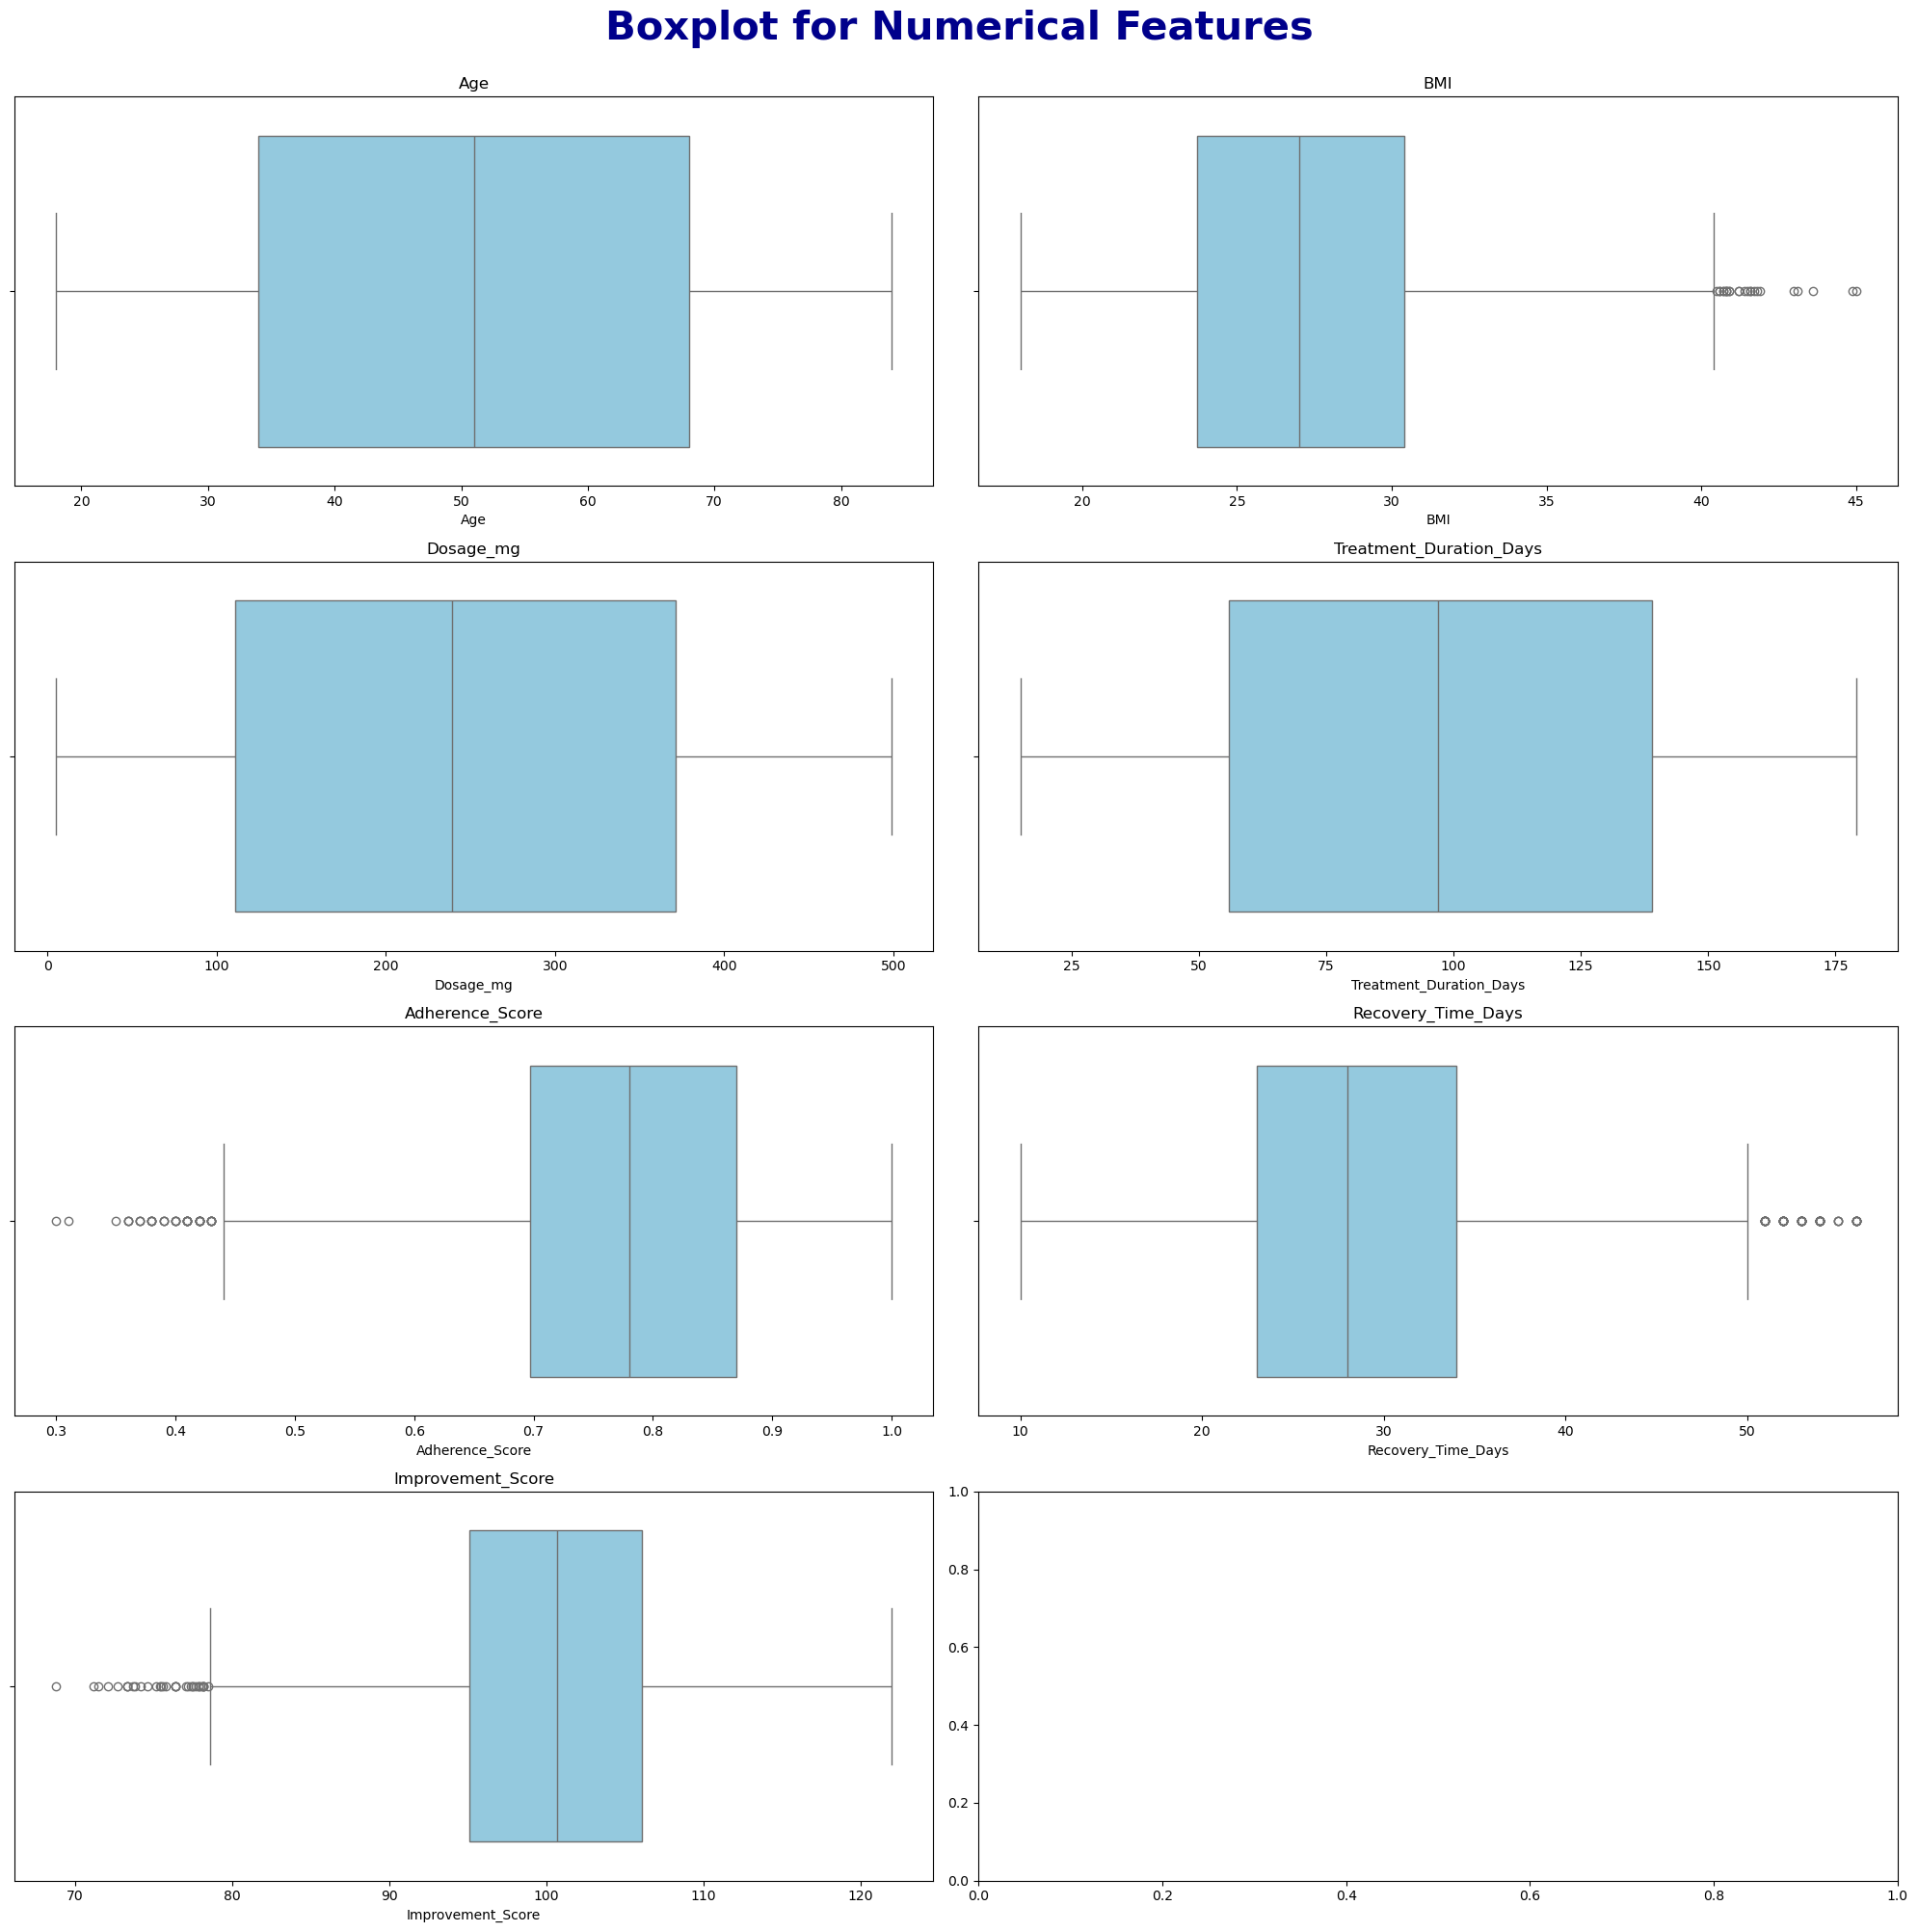

In [34]:
# Plotting boxplot to detect outliers 

# Create a figure with 7 rows and 2 columns of subplot
# Axes is individual plot where we plot boxplot here
fig, axes = plt.subplots(4, 2 , figsize=(20, 20))

# Flatten the 2D array of axes into a 1D array so we can loop easily
axes = axes.flatten()

# Iterate throught each column with position which helps to pick up correct subplot
for i, col in enumerate(num_col):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col)

# Adjusting the layout so that the plots don't overlap with each other
plt.suptitle('Boxplot for Numerical Features', fontsize=30, fontweight='bold', color='darkblue', y = 1)
plt.tight_layout()
plt.show()

In [35]:
# Here we are using log transformation to handle outliers
# Log Transformation is a technique used to reduce the effect of extreme values (outliers) and make skewed data more normal.

df['BMI'] = np.log1p(df['BMI'])
df['Adherence_Score'] = np.log1p(df['Adherence_Score'])
df['Recovery_Time_Days'] = np.log1p(df['Recovery_Time_Days'])
df['Improvement_Days'] = np.log1p(df['Improvement_Score'])

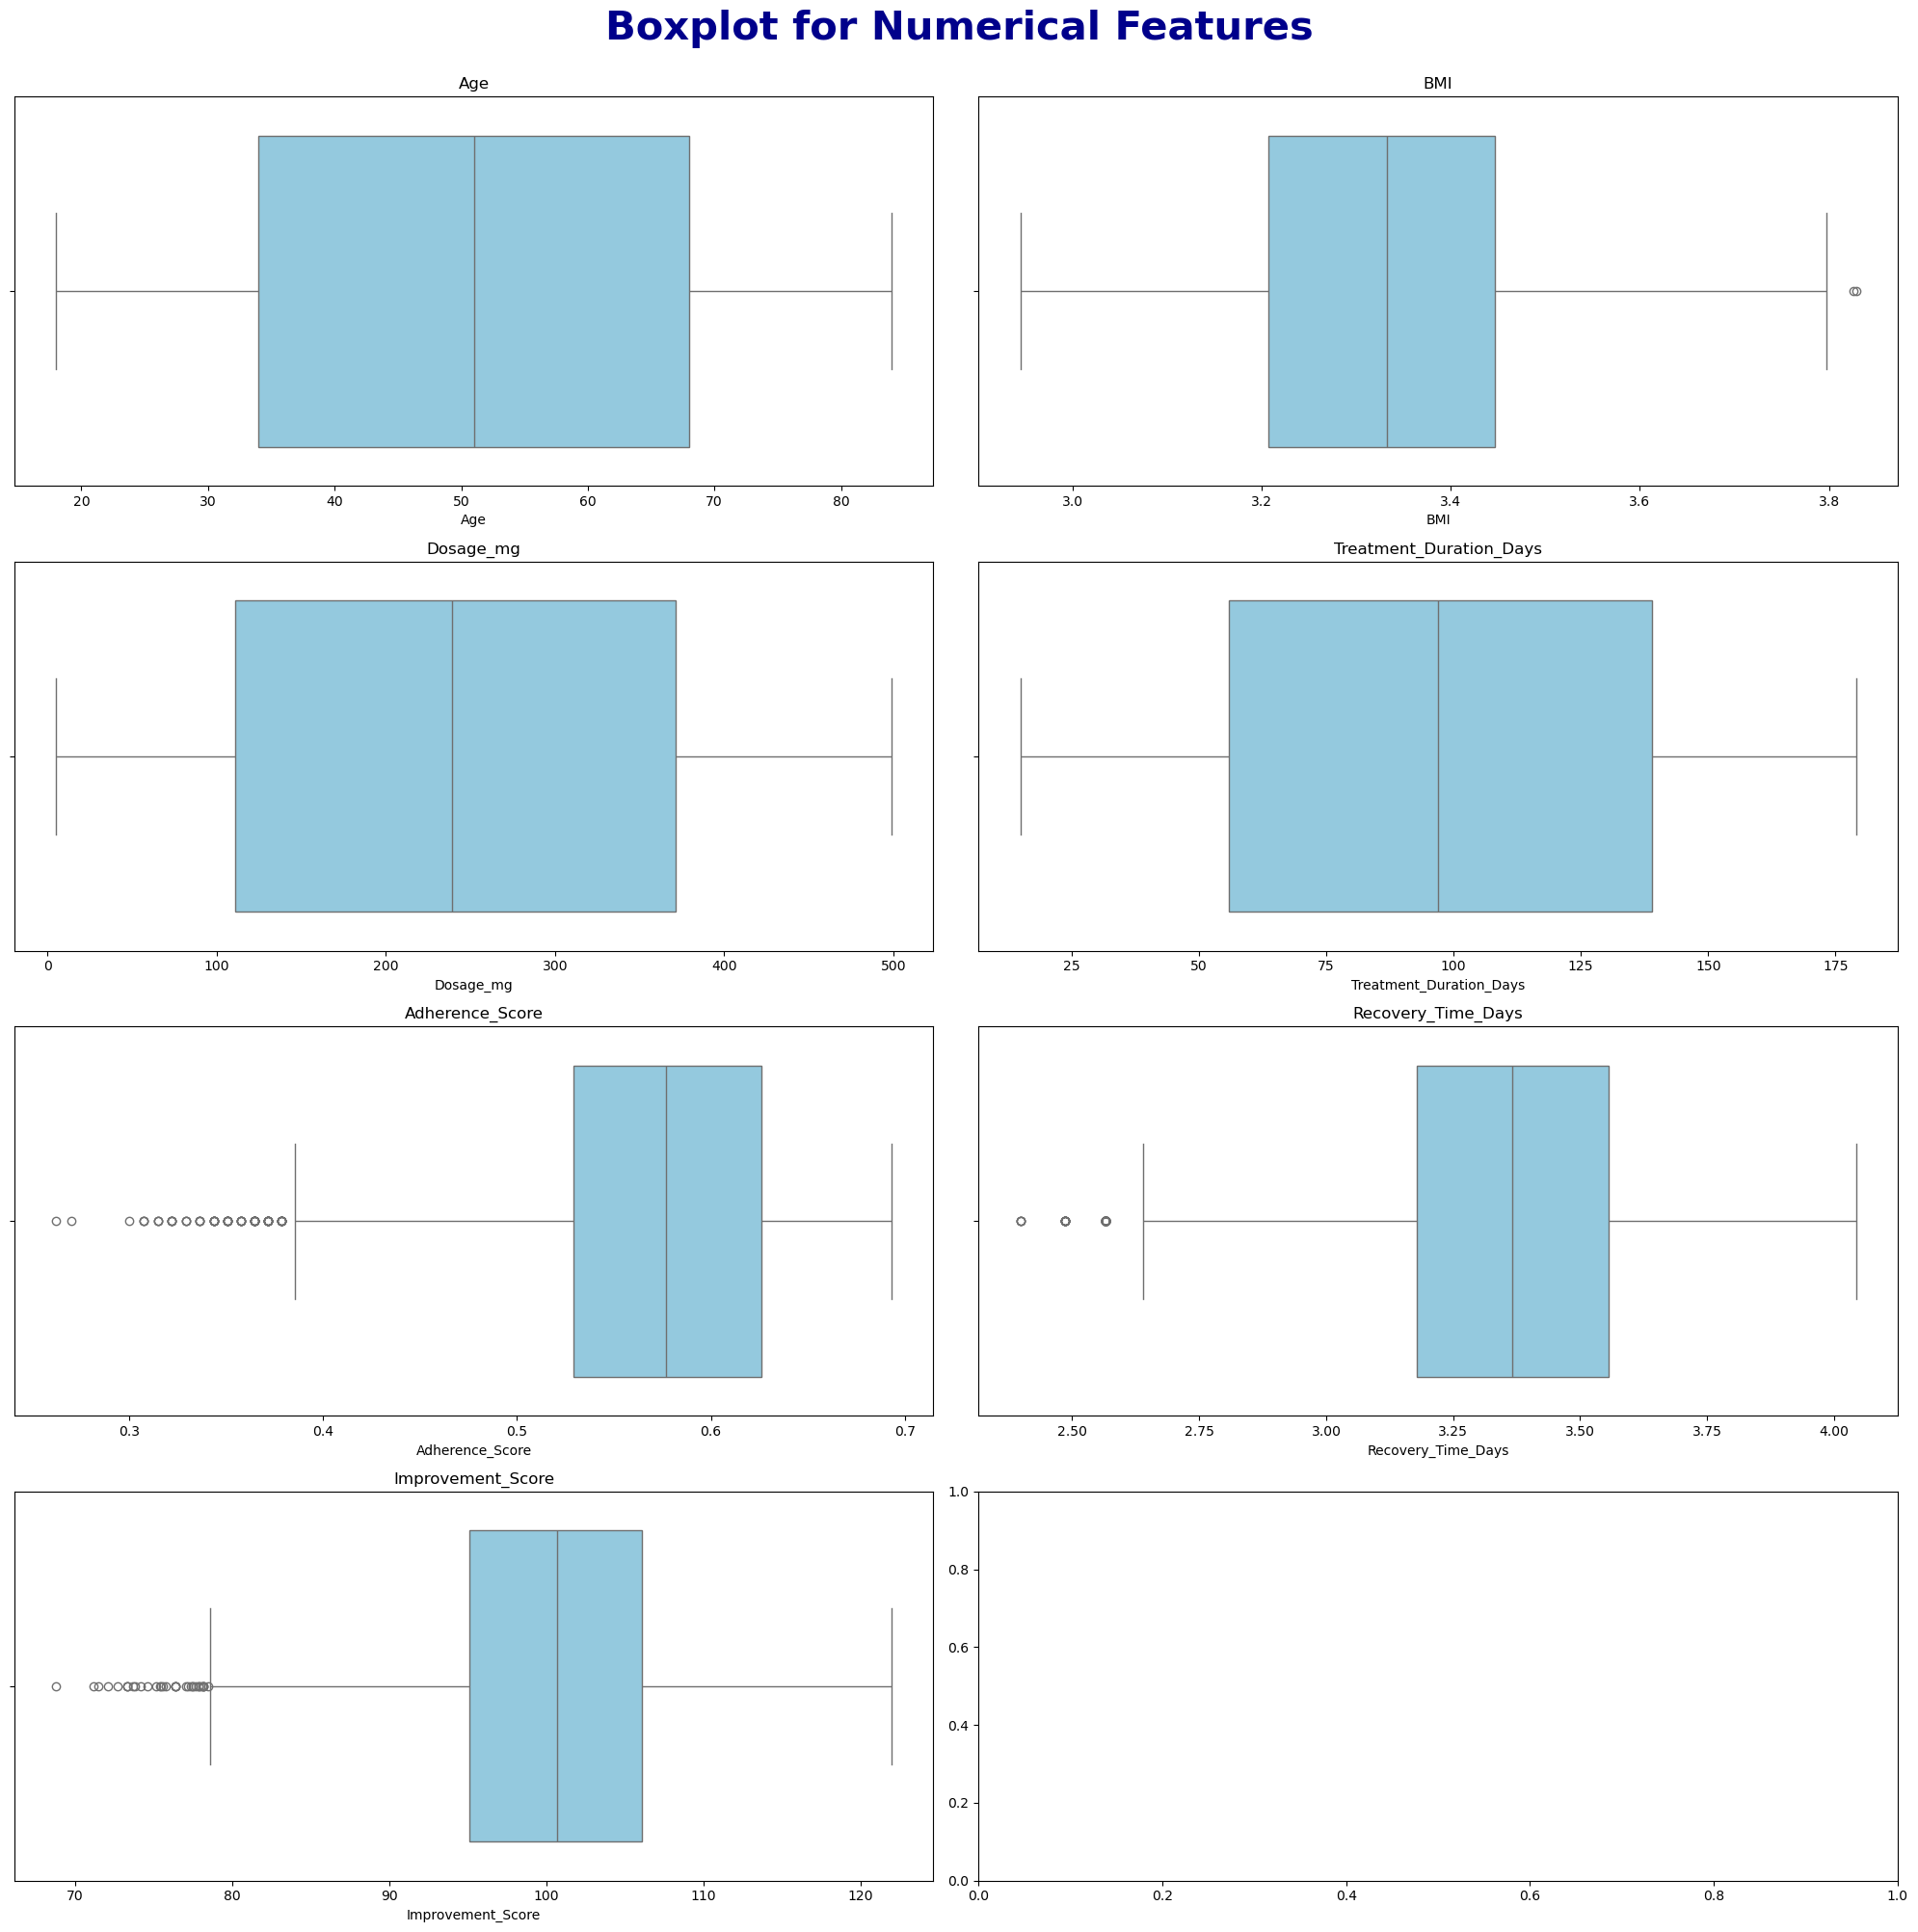

In [36]:
# Plotting boxplot to detect outliers 

# Create a figure with 7 rows and 2 columns of subplot
# Axes is individual plot where we plot boxplot here
fig, axes = plt.subplots(4, 2 , figsize=(20, 20))

# Flatten the 2D array of axes into a 1D array so we can loop easily
axes = axes.flatten()

# Iterate throught each column with position which helps to pick up correct subplot
for i, col in enumerate(num_col):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col)

# Adjusting the layout so that the plots don't overlap with each other
plt.suptitle('Boxplot for Numerical Features', fontsize=30, fontweight='bold', color='darkblue', y = 1)
plt.tight_layout()
plt.show()

In [37]:
# Now we are using capping method to handle remaining outliers
# Capping is a way to handle outliers by replacing extreme values with a maximum or minimum limit to reduce their effect on analysis.

for col in num_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)

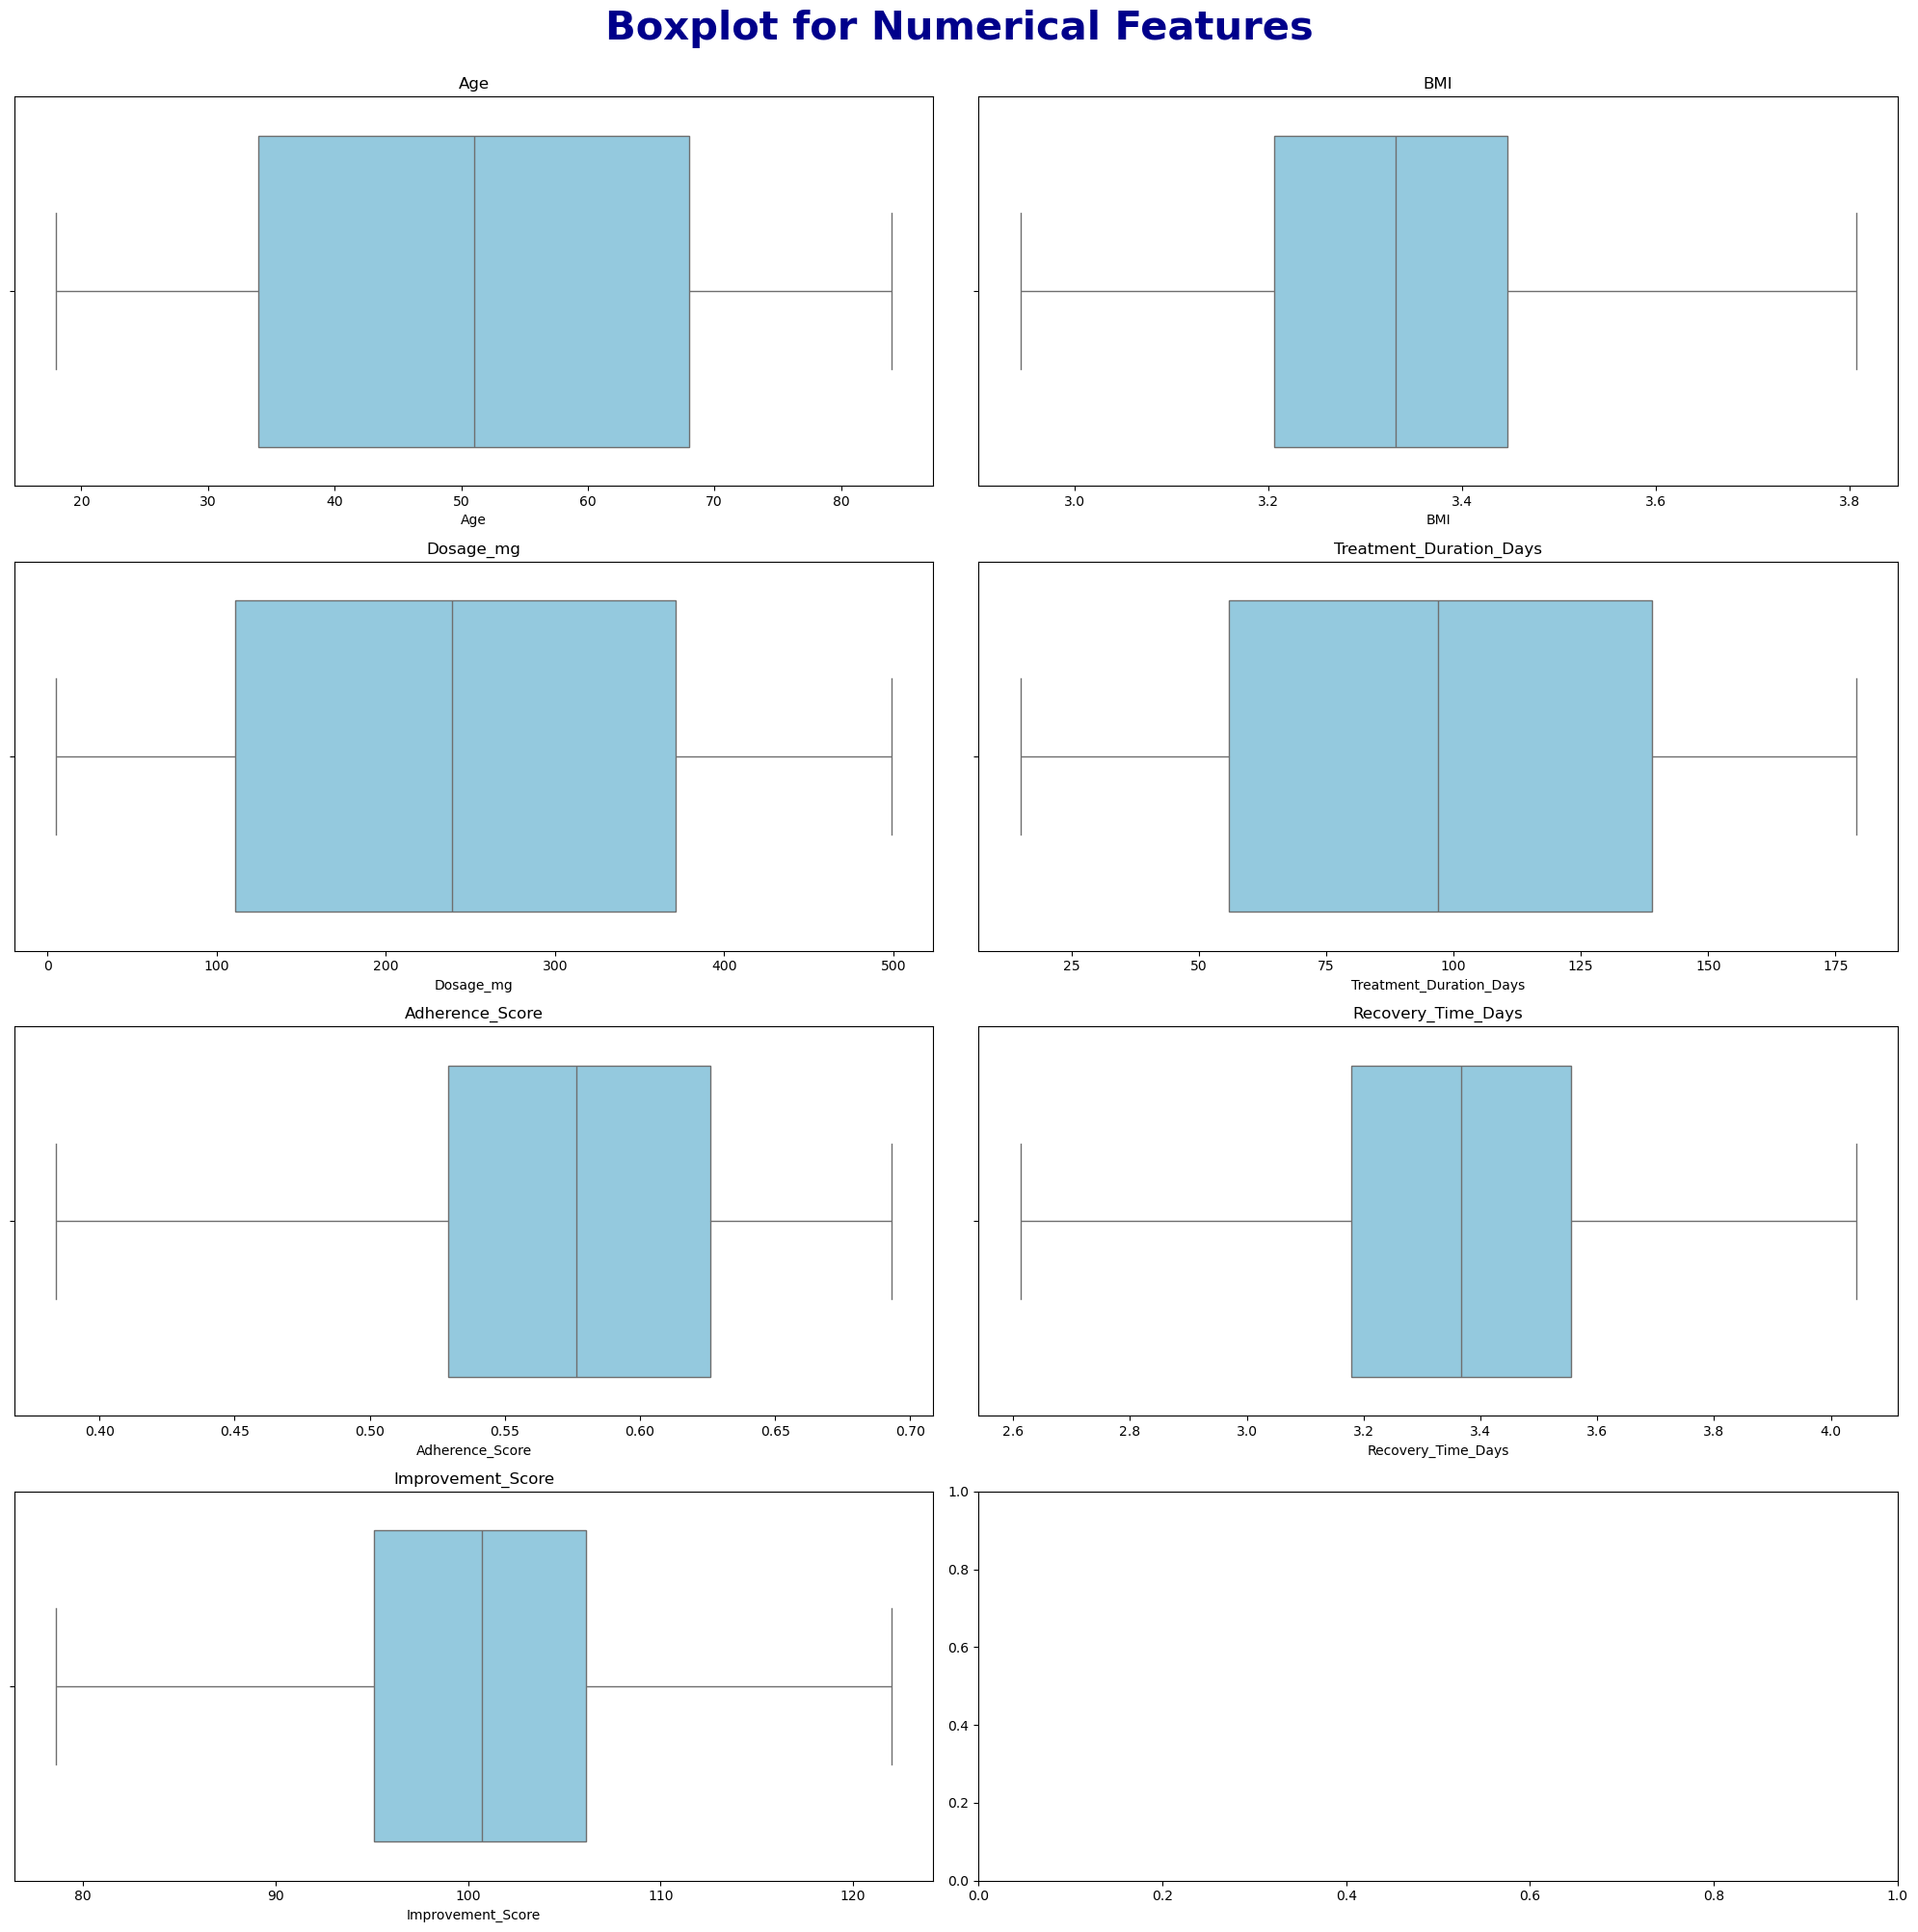

In [38]:
# Plotting boxplot to detect outliers 

# Create a figure with 7 rows and 2 columns of subplot
# Axes is individual plot where we plot boxplot here
fig, axes = plt.subplots(4, 2 , figsize=(20, 20))

# Flatten the 2D array of axes into a 1D array so we can loop easily
axes = axes.flatten()

# Iterate throught each column with position which helps to pick up correct subplot
for i, col in enumerate(num_col):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col)

# Adjusting the layout so that the plots don't overlap with each other
plt.suptitle('Boxplot for Numerical Features', fontsize=30, fontweight='bold', color='darkblue', y = 1)
plt.tight_layout()
plt.show()

In [39]:
# Checking outliers in numerical columns using IQR 

for col in num_col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f'Column {col} has {len(outliers)} outliers.')

Column Age has 0 outliers.
Column BMI has 0 outliers.
Column Dosage_mg has 0 outliers.
Column Treatment_Duration_Days has 0 outliers.
Column Adherence_Score has 0 outliers.
Column Recovery_Time_Days has 0 outliers.
Column Improvement_Score has 0 outliers.


In [40]:
# Generating profile report after cleaning the dataset

# Profile = ProfileReport(df)
# Profile

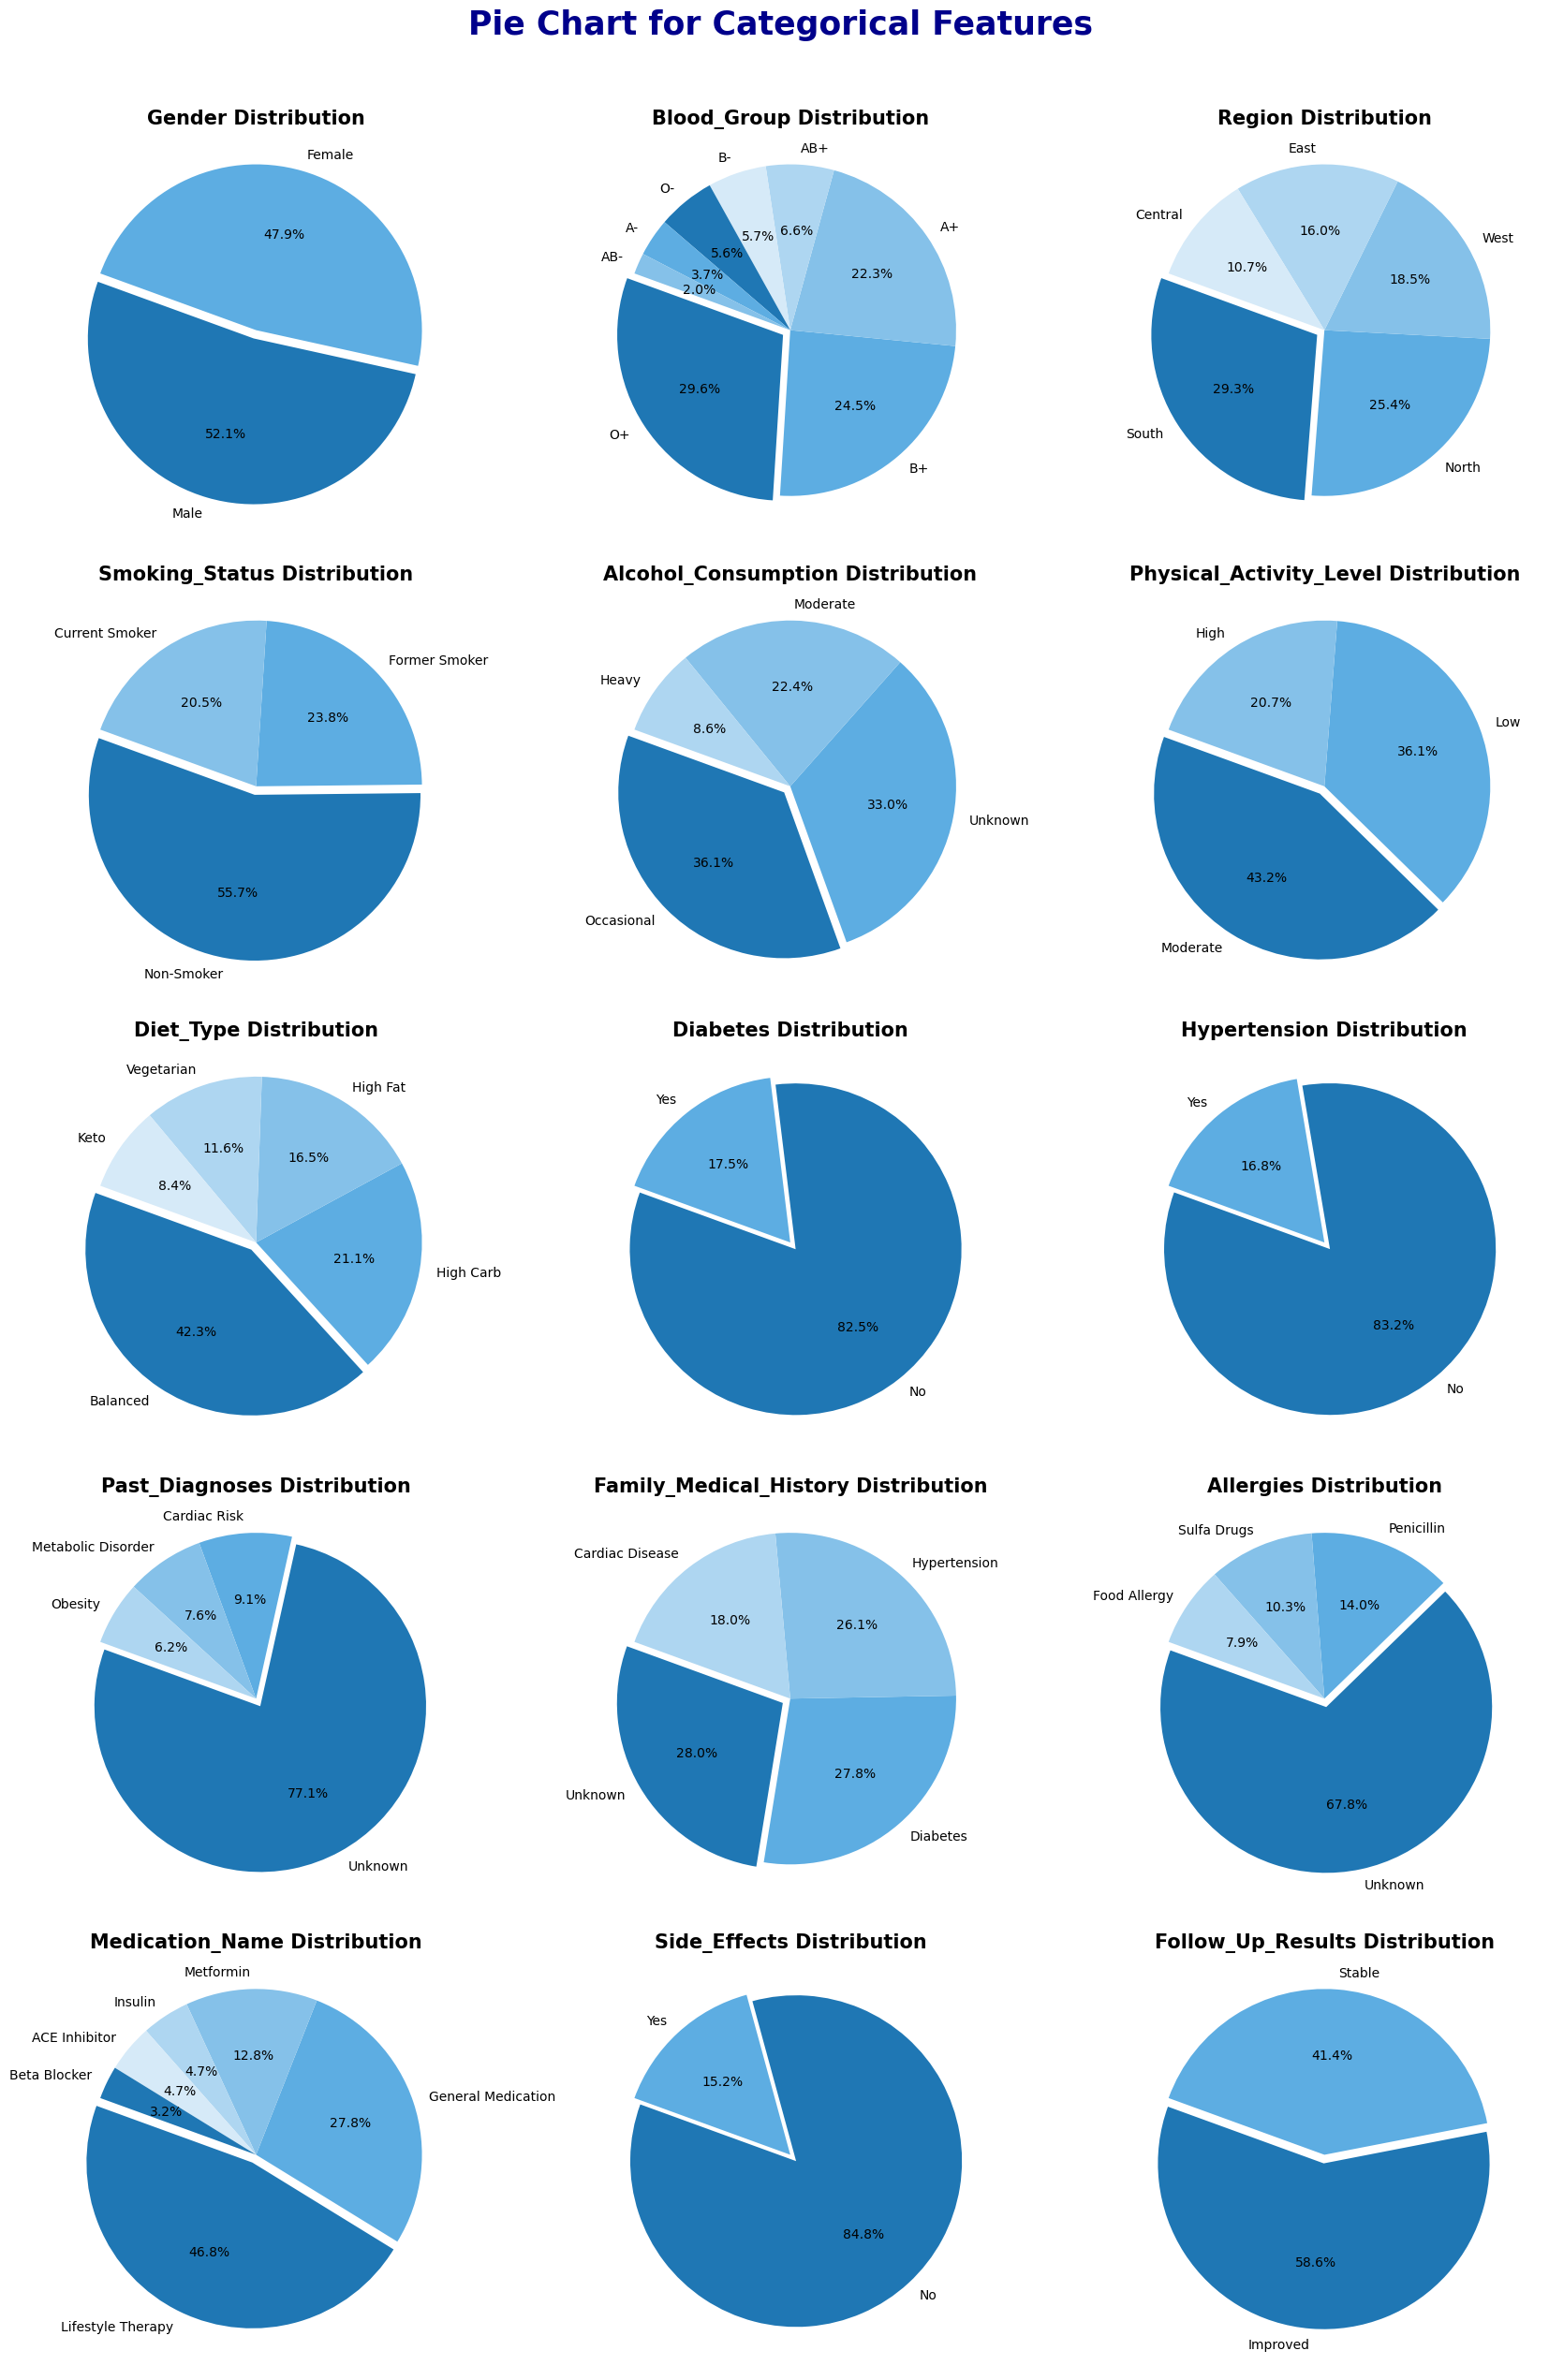

In [41]:
# Displaying pie chart to get distribution of categorical columns

# Create subplots: 4 rows, 2 columns
fig, axes = plt.subplots(5,3, figsize=(17, 25))  

# Flatten the 2D axes array to 1D for easy iteration
axes = axes.flatten()

# Categorical columns
cat_cols = ['Gender', 'Blood_Group', 'Region', 'Smoking_Status', 'Alcohol_Consumption', 'Physical_Activity_Level', 'Diet_Type', 'Diabetes', 'Hypertension', 'Past_Diagnoses', 'Family_Medical_History', 'Allergies', 'Medication_Name', 'Side_Effects', 'Follow_Up_Results']


# Defining the color palette
blue_colors = ['#1f77b4', '#5dade2', '#85c1e9', '#aed6f1', '#d6eaf8']

for i, col in enumerate(cat_cols):
    data = df[col].value_counts().values
    labels = df[col].value_counts().index
    explode = [0.05 if v == max(data) else 0 for v in data]
    axes[i].pie(data, labels=labels, autopct='%1.1f%%', explode=explode, colors=blue_colors, startangle = 160, radius=0.96)
    axes[i].set_title(f'{col} Distribution', fontweight='bold', fontsize=15, y=0.96)
plt.suptitle('Pie Chart for Categorical Features', fontsize=25, fontweight='bold', color='darkblue', y = 1.015)
plt.tight_layout()
plt.show()

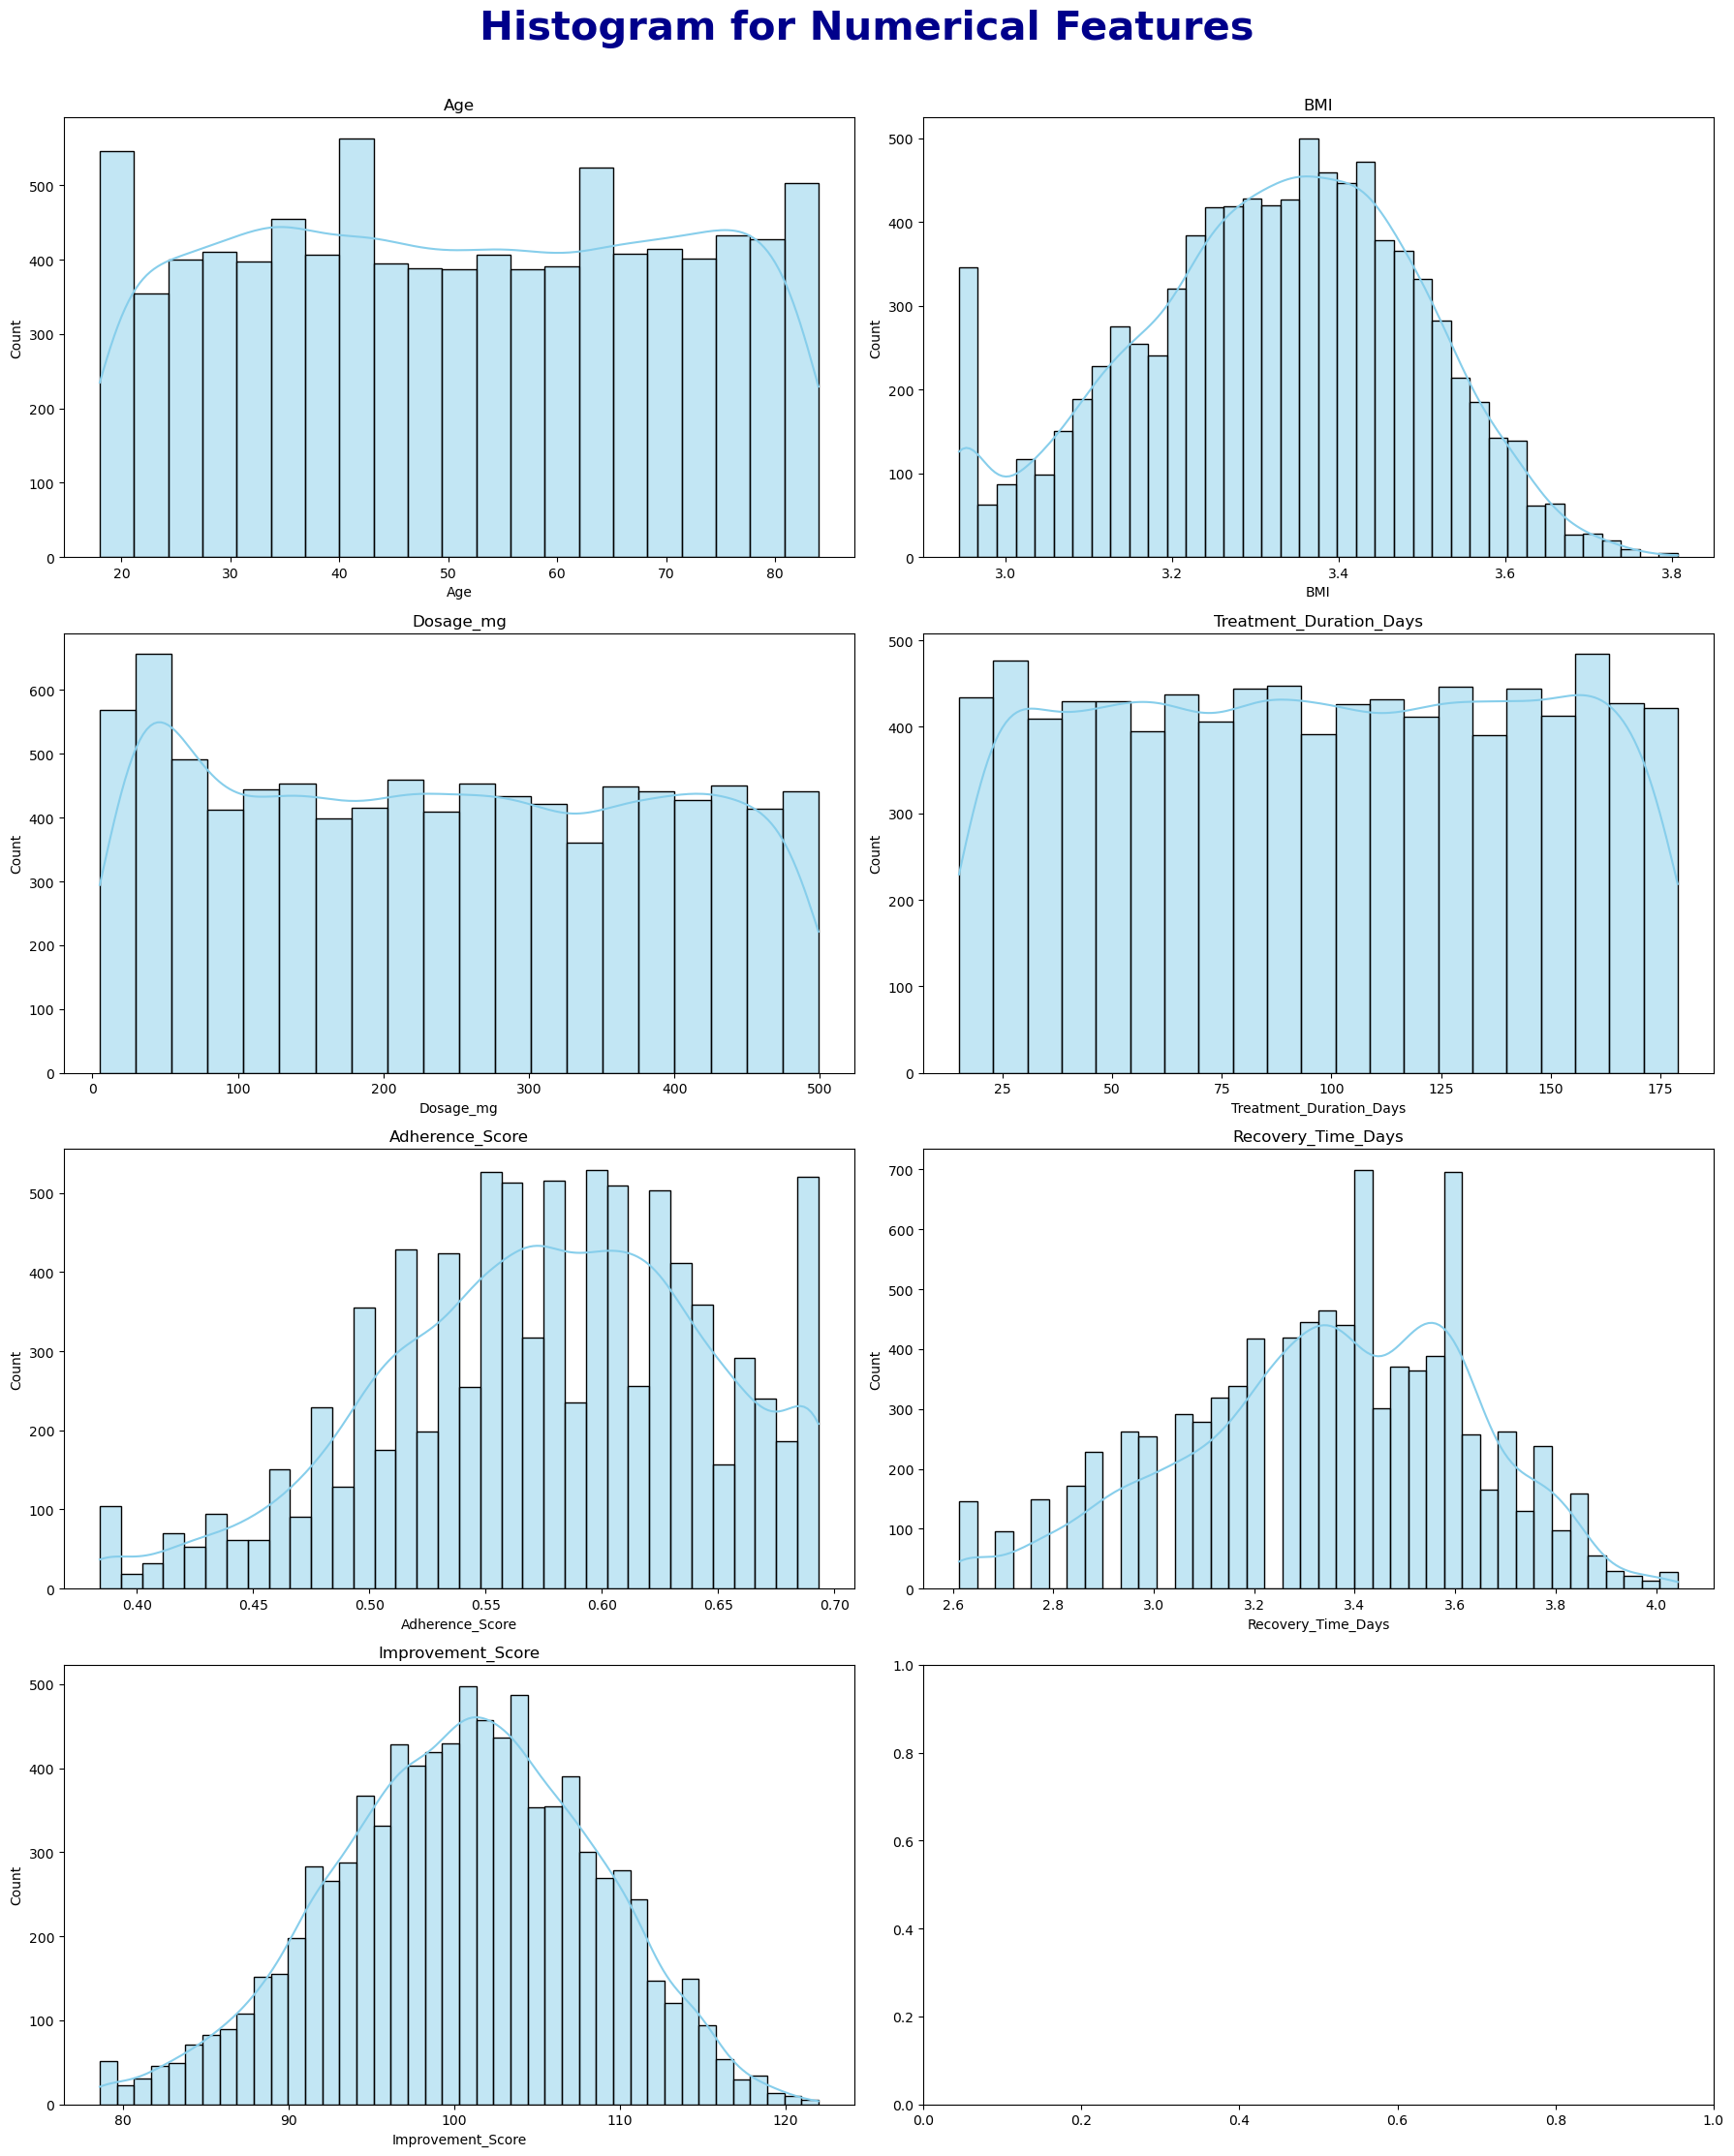

In [42]:
# Plotting histogram to check distribution of numerical columns

# Create a figure with 7 rows and 2 columns of subplot
fig, axes = plt.subplots(4, 2, figsize=(18, 22))
axes = axes.flatten()
for i, col in enumerate(num_col):
    sns.histplot(x=df[col], ax=axes[i], color='skyblue', kde=True)
    axes[i].set_title(col)

# Adjusting the layout so that the plots don't overlap with each other
plt.suptitle('Histogram for Numerical Features', fontsize=30, fontweight='bold', color='darkblue', y = 1.01)
plt.tight_layout()
plt.show()

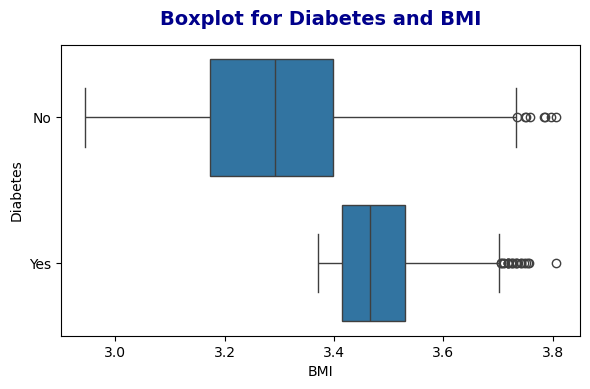

In [43]:
# Relationship between BMI and Diabetes

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['BMI'], y=df['Diabetes'])
plt.title('Boxplot for Diabetes and BMI', y=1.04, fontweight='bold', fontsize=14, color='darkblue')
plt.tight_layout()
plt.show()

#### **Relationship between BMI and Diabetes**
1. People with Diabetes have higher BMI.
2. This means diabetic people generally have higher BMI.
3. Non-diabetic patients generally have lower BMI.
4. Both groups have some very high BMI values.
5. BMI varies more for non-diabetic patients.

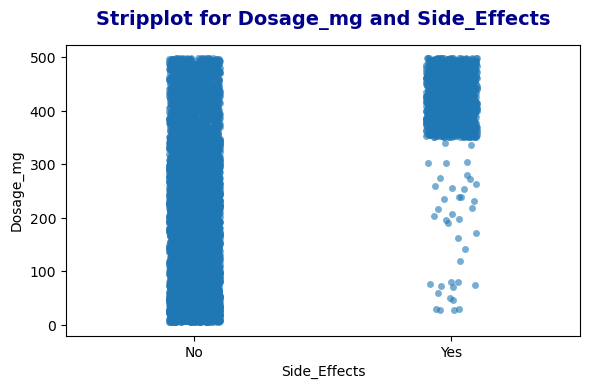

In [45]:
# Relationship between side effects and dosage mg

plt.figure(figsize=(6, 4))
sns.stripplot(x='Side_Effects',y='Dosage_mg', data=df, jitter=True, alpha=0.6)
plt.title('Stripplot for Dosage_mg and Side_Effects', y=1.04, fontweight='bold', fontsize=14, color='darkblue')
plt.tight_layout()
plt.show()

#### **Relationship between Dosage_mg and Side_Effects**
1. Generally patient have side effects when dosage_mg are higher.
2. Some patients have side effects with lower dosage.
3. Patients with no side effects have variation in dosage_mg.
4. Many patients do not have side effects, even with higher doses.
5. As dosage_mg increases, the chance of side effect increases.

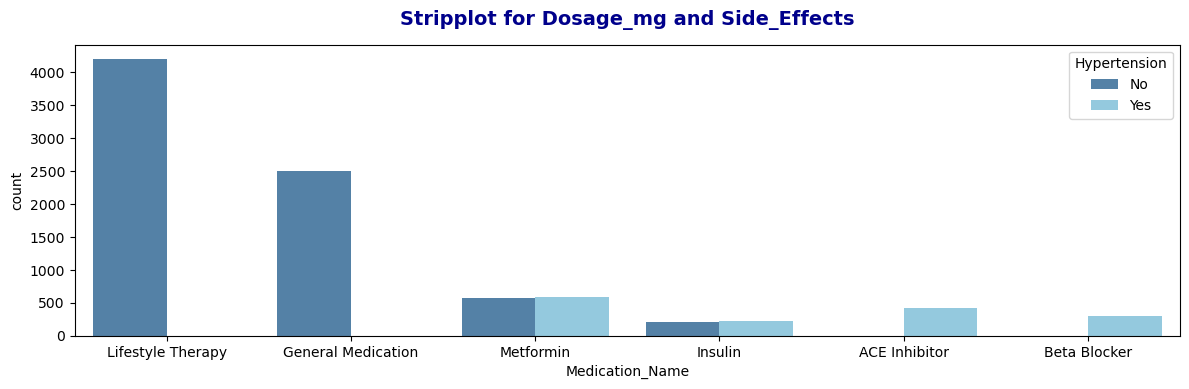

In [47]:
# Relationship between Dosage mg and Side Effects

plt.figure(figsize=(12,4))
sns.countplot(x='Medication_Name', hue='Hypertension',data=df, palette=['steelblue','skyblue'])
plt.title('Stripplot for Dosage_mg and Side_Effects', y=1.04, fontweight='bold', fontsize=14, color='darkblue')
plt.tight_layout()
plt.show()

In [48]:
# Relationship between Medication and Hypertension using crosstab

pd.crosstab(df['Hypertension'], df['Medication_Name'])

Medication_Name  ACE Inhibitor  Beta Blocker  General Medication  Insulin  \
Hypertension                                                                
No                           0             0                2503      201   
Yes                        420           291                   0      219   

Medication_Name  Lifestyle Therapy  Metformin  
Hypertension                                   
No                            4210        576  
Yes                              0        580

#### **Relationship between Medication and Hypertension**
##### **Lifestyle Therapy**
- Lifestyle therapy has the highest number of patients, which is 4210.
- It is mostly used by patients who do not have hypertension.

##### **General Medication**
- It has the second highest number of patients, which is 2503.
- It is used by patients who do not have hypertension.

##### **Metformin**
- It is used by both types of patients.
- 580 patients have hypertension, and 576 patients do not have hypertension.

##### **Insulin**
- It is used by both types of patients.
- 219 patients have hypertension, and 201 patients do not have hypertension.

##### **Beta Blocker**
- It is used only by patients with hypertension.
- Number of patients is 291.

##### **ACI Inhibitor**
- It is used by patients with hypertension.
- Number of patients is 420.


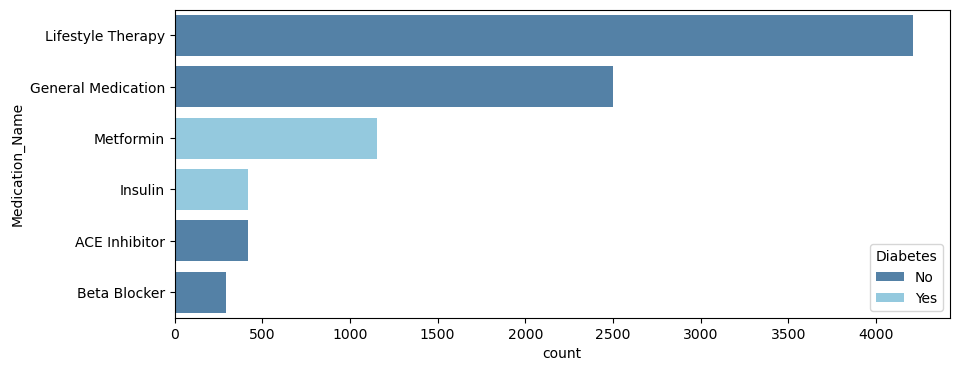

In [50]:
# Relationship between Medication and Diabetes

plt.figure(figsize=(10,4))
sns.countplot(y='Medication_Name', hue='Diabetes',data=df, palette=['steelblue','skyblue'])
plt.show()

In [51]:
# Relationship between Medication and Diabetes using crosstab

pd.crosstab(df['Diabetes'], df['Medication_Name'])

Medication_Name  ACE Inhibitor  Beta Blocker  General Medication  Insulin  \
Diabetes                                                                    
No                         420           291                2503        0   
Yes                          0             0                   0      420   

Medication_Name  Lifestyle Therapy  Metformin  
Diabetes                                       
No                            4210          0  
Yes                              0       1156

#### **Relationship between Medication and Diabetes**
##### **Lifestyle Therapy**
- Lifestyle therapy has the highest number of patients, which is 4210.
- It is mostly used by non-diabetic patients.

##### **General Medication**
- It has the second highest number of patients, which is 2503.
- It is used by non-diabetic patients.

##### **Metformin**
- It is used by diabetic patients.
- Number of patients using this is 1156.

##### **Insulin**
- It is used by diabetic patients.
- Number of patients using this is 420.

##### **Beta Blocker**
- It is used by non-diabetic patients.
- Number of patients using this is 291.

##### **ACI Inhibitor**
- It is used by non-diabetic patients.
- Number of patients using this is 420.


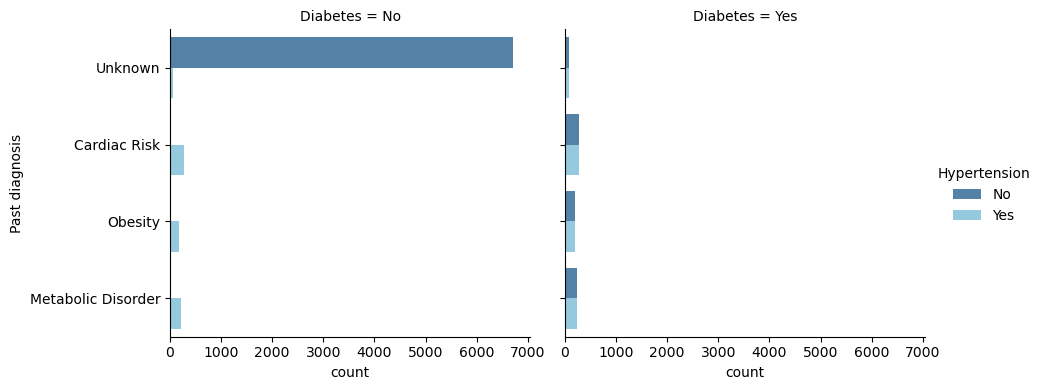

In [53]:
# Relationship between past diagnosis, diabetes and hypertension

g = sns.catplot(data=df, y='Past_Diagnoses', hue='Hypertension', col='Diabetes', kind='count', height=4, aspect=1.2, palette=['steelblue','skyblue'])
g.set_axis_labels('count','Past diagnosis')
g.set_titles('Diabetes = {col_name}')
plt.show()

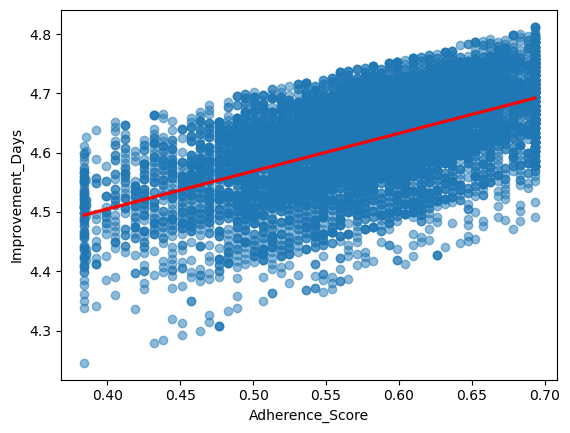

In [54]:
sns.regplot(x='Adherence_Score', y='Improvement_Days', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'Red'})
plt.show()

#### **Relationship between Adherence Score and Improvement Days**
1. There is a positive linear relationship between adherence score and improvement days.
2. Patients who follow the treatment better show continuous improvement.
3. As the adherence score increases, improvement days also increase.

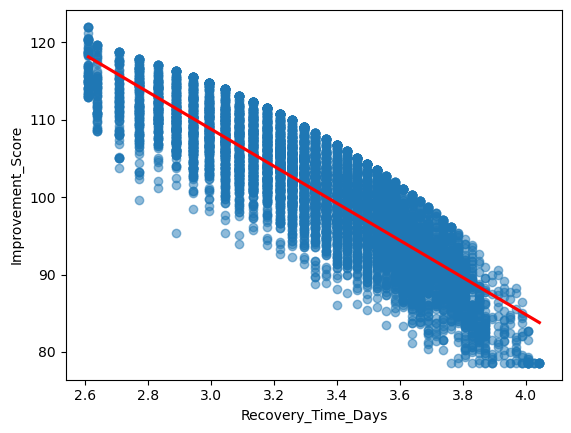

In [56]:
# Relationship between Recovery Time Days and Improvement Days

sns.regplot(x='Recovery_Time_Days', y='Improvement_Score', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'Red'})
plt.show()

#### **Relationship between Recovery Time Days and Improvement Days**
1. When recovery time increases, improvement days decreases.
2. Their is negative relationship between improvement days andd recovery time days.
3. It indicates that patients shows improvement earlier tend to recover faster.

C:\Users\HP\AppData\Local\Temp\ipykernel_14492\1344781372.py:4: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Past_Diagnoses', hue='Medication_Name',data=df , palette=['steelblue', 'skyblue', 'dodgerblue', 'lightskyblue'])


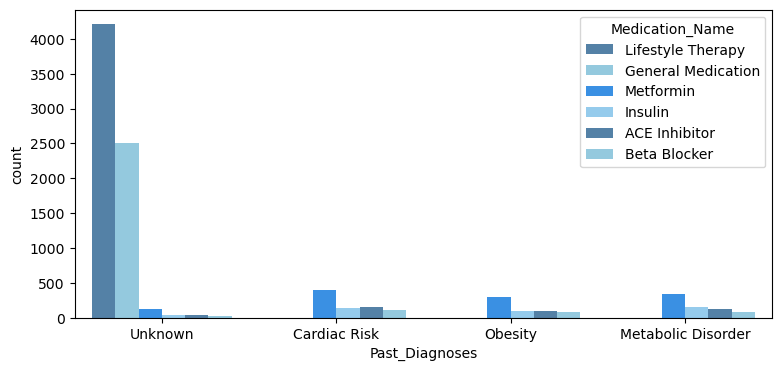

In [58]:
# Relationship between Medication and Hypertension

plt.figure(figsize=(9,4))
sns.countplot(x='Past_Diagnoses', hue='Medication_Name',data=df , palette=['steelblue', 'skyblue', 'dodgerblue', 'lightskyblue'])
# plt.xticks(rotation = 45)
plt.show()

In [59]:
# Applying nominal label encoding 

from sklearn.preprocessing import LabelEncoder   # importing label encoder from sklearn.preprocessing
le = LabelEncoder()                          # initializing label encoder
nominal_cols = ['Gender', 'Blood_Group', 'Region', 'Diet_Type','Diabetes','Hypertension', 'Past_Diagnoses', 'Family_Medical_History', 'Allergies', 'Medication_Name', 'Side_Effects', 'Relapse', 'Follow_Up_Results']
for col in nominal_cols:
    df[col] = le.fit_transform(df[col])

In [60]:
# Applying ordinal encoding

from sklearn.preprocessing import OrdinalEncoder    # importing ordinal encoder from sklearn.preprocessing

alcohol_category = [['Unknown', 'Occasional', 'Moderate', 'Heavy']]
smoke_category = [['Non-Smoker', 'Former Smoker', 'Current Smoker']]
activity_category = [['Low', 'Moderate', 'High']]

oe = OrdinalEncoder(categories=alcohol_category)       # initializing ordinal encoder
df['Alcohol_Consumption'] = oe.fit_transform(df[['Alcohol_Consumption']])     # applying ordinal encoder to Alcohol_Consumption column
oe = OrdinalEncoder(categories=smoke_category)         # initializing ordinal encoder
df['Smoking_Status'] = oe.fit_transform(df[['Smoking_Status']])               # applying ordinal encoder to Smoking_Status column
oe = OrdinalEncoder(categories=activity_category)      # initializing ordinal encoder
df['Physical_Activity_Level'] = oe.fit_transform(df[['Physical_Activity_Level']])   # applying ordinal encoder to Physical_Activity_Level column

In [61]:
# Displaying first five rows

df.head()

Age  Gender       BMI  Blood_Group  Region  Smoking_Status  \
0   69       1  3.317816            6       1             0.0   
1   32       0  3.346389            6       0             2.0   
2   78       0  3.265759            0       1             0.0   
3   38       0  3.427515            5       3             0.0   
4   41       1  3.332205            0       4             0.0   

   Alcohol_Consumption  Physical_Activity_Level  Diet_Type  Diabetes  \
0                  3.0                      0.0          1         0   
1                  1.0                      2.0          4         0   
2                  1.0                      2.0          4         0   
3                  0.0                      1.0          1         0   
4                  3.0                      1.0          0         0   

   Hypertension  Past_Diagnoses  Family_Medical_History  Allergies  \
0             0               3                       2          3   
1             0               3                       3          3   
2             0               3                       2          2   
3             0               3                       2          3   
4             0               3                       3          3   

   Medication_Name  Dosage_mg  Treatment_Duration_Days  Adherence_Score  \
0                4        154                      143         0.570980   
1                4        444                      141         0.570980   
2                2        190                       85         0.476234   
3                4        160                       76         0.609766   
4                2        248                      161         0.636577   

   Side_Effects  Recovery_Time_Days  Improvement_Score  Relapse  \
0             0            3.295837              102.2        0   
1             0            3.367296              100.6        0   
2             0            3.091042              101.4        0   
3             0            3.258097              105.1        0   
4             0            3.218876              107.4        0   

   Follow_Up_Results  Improvement_Days  
0                  1          4.636669  
1                  1          4.621044  
2                  0          4.628887  
3                  0          4.664382  
4                  0          4.685828

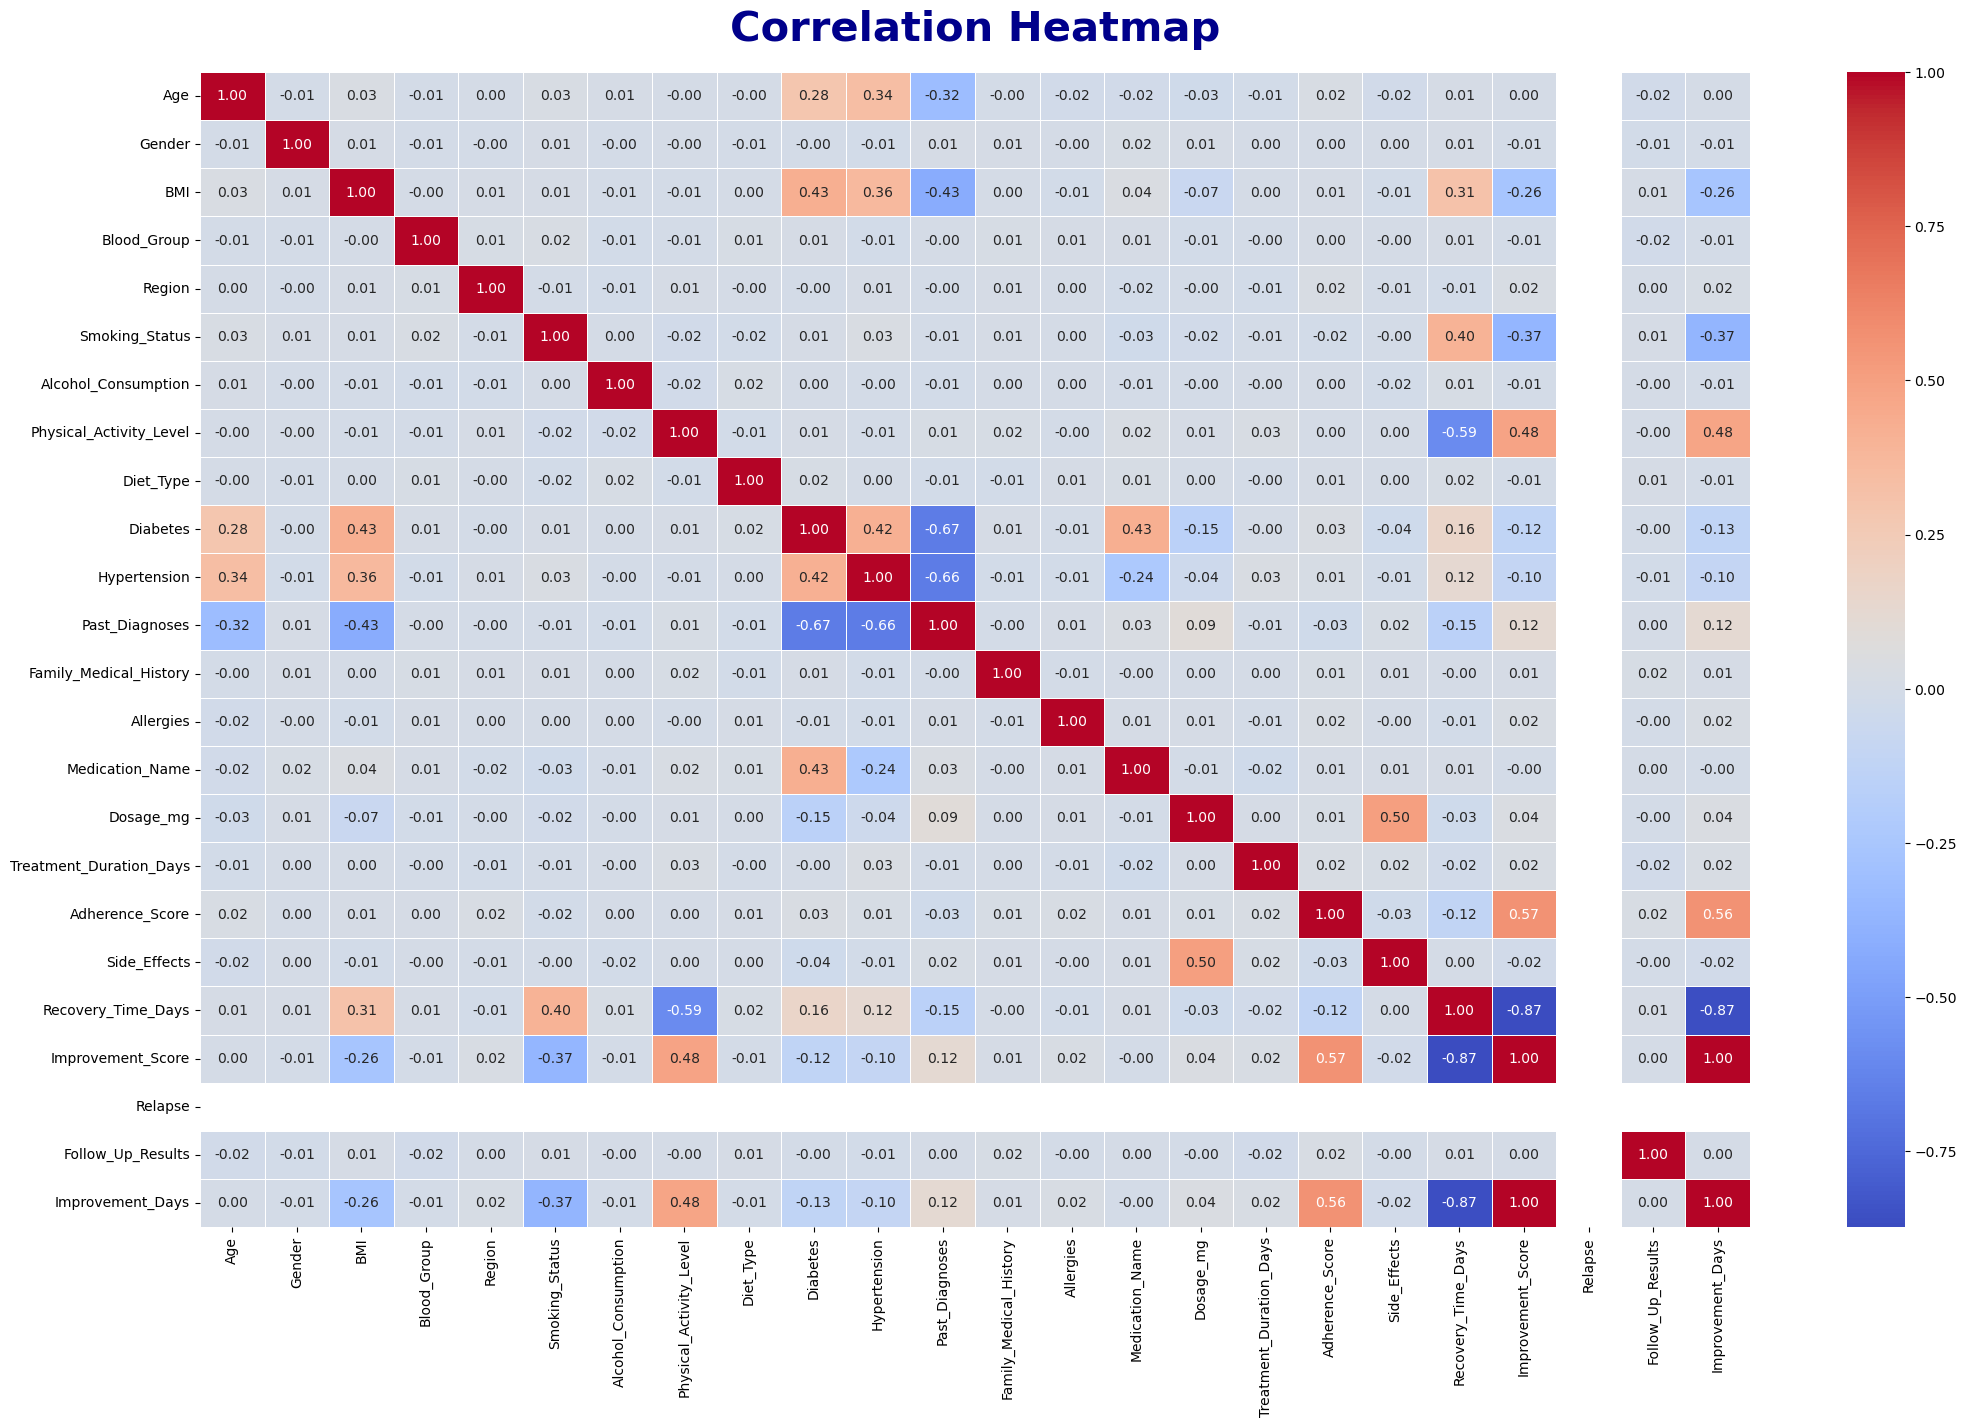

In [62]:
# Creating heatmap to check correlation

plt.figure(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=30, fontweight='bold', y=1.02, color='darkblue')
plt.show()

In [63]:
# Here we are using Robust Scaling on features with outliers

from sklearn.preprocessing import RobustScaler   # importing robust scaler from skleran.preprocessing
scaler = RobustScaler()                     # initializing robust scaler

# List of columns with numerical values with outliers
cols = ['BMI','Recovery_Time_Days','Improvement_Days']

# Applying robust scaler to each numerical columns
df[cols] = scaler.fit_transform(df[cols])

In [64]:
# Displaying first five rows

df.head()

Age  Gender       BMI  Blood_Group  Region  Smoking_Status  \
0   69       1 -0.059952            6       1             0.0   
1   32       0  0.059102            6       0             2.0   
2   78       0 -0.276849            0       1             0.0   
3   38       0  0.397118            5       3             0.0   
4   41       1  0.000000            0       4             0.0   

   Alcohol_Consumption  Physical_Activity_Level  Diet_Type  Diabetes  \
0                  3.0                      0.0          1         0   
1                  1.0                      2.0          4         0   
2                  1.0                      2.0          4         0   
3                  0.0                      1.0          1         0   
4                  3.0                      1.0          0         0   

   Hypertension  Past_Diagnoses  Family_Medical_History  Allergies  \
0             0               3                       2          3   
1             0               3                       3          3   
2             0               3                       2          2   
3             0               3                       2          3   
4             0               3                       3          3   

   Medication_Name  Dosage_mg  Treatment_Duration_Days  Adherence_Score  \
0                4        154                      143         0.570980   
1                4        444                      141         0.570980   
2                2        190                       85         0.476234   
3                4        160                       76         0.609766   
4                2        248                      161         0.636577   

   Side_Effects  Recovery_Time_Days  Improvement_Score  Relapse  \
0             0           -0.189399              102.2        0   
1             0            0.000000              100.6        0   
2             0           -0.732196              101.4        0   
3             0           -0.289427              105.1        0   
4             0           -0.393380              107.4        0   

   Follow_Up_Results  Improvement_Days  
0                  1          0.135102  
1                  1         -0.009078  
2                  0          0.063294  
3                  0          0.390821  
4                  0          0.588711

In [65]:
# Now using Standard Scaler for the features which are normally distributed

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# List of columns with normal distribution 
cols = ['Age','Dosage_mg','Treatment_Duration_Days','Adherence_Score']

# Applying standard scaler to each numerical column
df[cols] = scaler.fit_transform(df[cols])

In [66]:
# Displaying first five rows

df.head()

Age  Gender       BMI  Blood_Group  Region  Smoking_Status  \
0  0.929584       1 -0.059952            6       1             0.0   
1 -0.986728       0  0.059102            6       0             2.0   
2  1.395713       0 -0.276849            0       1             0.0   
3 -0.675974       0  0.397118            5       3             0.0   
4 -0.520598       1  0.000000            0       4             0.0   

   Alcohol_Consumption  Physical_Activity_Level  Diet_Type  Diabetes  \
0                  3.0                      0.0          1         0   
1                  1.0                      2.0          4         0   
2                  1.0                      2.0          4         0   
3                  0.0                      1.0          1         0   
4                  3.0                      1.0          0         0   

   Hypertension  Past_Diagnoses  Family_Medical_History  Allergies  \
0             0               3                       2          3   
1             0               3                       3          3   
2             0               3                       2          2   
3             0               3                       2          3   
4             0               3                       3          3   

   Medication_Name  Dosage_mg  Treatment_Duration_Days  Adherence_Score  \
0                4  -0.599208                 0.964623        -0.057044   
1                4   1.375437                 0.922704        -0.057044   
2                2  -0.354079                -0.251027        -1.405578   
3                4  -0.558353                -0.439663         0.495007   
4                2   0.040849                 1.341894         0.876618   

   Side_Effects  Recovery_Time_Days  Improvement_Score  Relapse  \
0             0           -0.189399              102.2        0   
1             0            0.000000              100.6        0   
2             0           -0.732196              101.4        0   
3             0           -0.289427              105.1        0   
4             0           -0.393380              107.4        0   

   Follow_Up_Results  Improvement_Days  
0                  1          0.135102  
1                  1         -0.009078  
2                  0          0.063294  
3                  0          0.390821  
4                  0          0.588711

In [67]:
from sklearn.model_selection import train_test_split  # import train_test_split to split the dataset into testing and training datasets

# Defining X and y
X = df[['Age', 'Gender', 'BMI', 'Blood_Group', 'Region', 'Smoking_Status', 'Alcohol_Consumption', 'Physical_Activity_Level', 'Diet_Type', 'Diabetes', 'Hypertension', 'Past_Diagnoses', 'Family_Medical_History', 'Allergies','Medication_Name', 'Dosage_mg', 'Treatment_Duration_Days', 'Adherence_Score', 'Side_Effects', 'Follow_Up_Results']]  # all columns except the target column
y = df[['Relapse', 'Recovery_Time_Days', 'Improvement_Days']]               # only target columns

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [139]:
# Importing models for supervised regression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score    # importing evaluation metrics
from sklearn.linear_model import LinearRegression                # importing linear regression
from sklearn.linear_model import Ridge, Lasso, ElasticNet 
from sklearn.tree import DecisionTreeRegressor                # importing decision tree regressor
from sklearn.ensemble import RandomForestRegressor        # importing random forest regressor  
from sklearn.ensemble import GradientBoostingRegressor         # importing random forest regressor
from sklearn.svm import SVR                                # importing support vector regressor
from sklearn.neighbors import KNeighborsRegressor        # importing knn regressor
from sklearn.multioutput import MultiOutputRegressor         # for predicting multiple outputs at the same time
from xgboost import XGBRegressor                        # importing XG boost regressor

In [141]:
# Linear Regression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 0.29938126383709357, MSE: 0.21280157232068733, RMSE: 0.46130420800236294
R2 Score: 0.6152426475980936


In [143]:
# Ridge Regressor

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 0.29938126383709357, MSE: 0.21280157232068733, RMSE: 0.46130420800236294
R2 Score: 0.6152426475980936


In [145]:
# Lasso Regressor

lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 0.29938126383709357, MSE: 0.21280157232068733, RMSE: 0.46130420800236294
R2 Score: 0.6152426475980936


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


In [147]:
# DecisionTreeRegressor

dtc_model = DecisionTreeRegressor(random_state=42)
dtc_model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 0.29938126383709357, MSE: 0.21280157232068733, RMSE: 0.46130420800236294
R2 Score: 0.6152426475980936


In [149]:
# RandomForestRegressor

rfr_model = RandomForestRegressor(n_estimators=100, random_state=42)
rfr_model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 0.29938126383709357, MSE: 0.21280157232068733, RMSE: 0.46130420800236294
R2 Score: 0.6152426475980936


In [150]:
# GradientBoostingRegressor

gbr_model = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
gbr_model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 0.29938126383709357, MSE: 0.21280157232068733, RMSE: 0.46130420800236294
R2 Score: 0.6152426475980936


In [152]:
# Support vector regressor

svr_model = MultiOutputRegressor(SVR())
svr_model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 0.29938126383709357, MSE: 0.21280157232068733, RMSE: 0.46130420800236294
R2 Score: 0.6152426475980936


In [153]:
# KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 0.29938126383709357, MSE: 0.21280157232068733, RMSE: 0.46130420800236294
R2 Score: 0.6152426475980936


In [156]:
# XGBRegressor

xgb_model = MultiOutputRegressor(XGBRegressor(random_state=42))
xgb_model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 0.29938126383709357, MSE: 0.21280157232068733, RMSE: 0.46130420800236294
R2 Score: 0.6152426475980936
